 <center> <h1> <b> Pattern Recognition and Machine Learning (EE2802 - AI2000) </b> </h1> </center>

<b> Programming Assignment 02 - Regression : </b> Welcome to the programming assignment (PA) on regression. This programing assignment focuses on understanding the basic concepts of linear regression.


<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions are not accepted
3. Please DO NOT use any machine learning libraries unless and otherwise specified.


<center> <h2> <b> Understanding Basic Concepts </b> </h2> </center>


<b> Part - (1) :  Understanding Error Surfaces </b>

According to www.geogebra.org, the relationship between human height (in
inches) and weight (in pounds) is given by <br>
 $$ t = 3.86x - 110.42 $$ 

(a) Generate 25 meaningful data points from this relationship, mimicking a
noisy sensor, where the noise follows a zero mean Gaussian with a variance
of 20. Plot the scatter plot of the data. <br>
(b) Now, we need to estimate the above relationship from the noisy data
generated in (a) by fitting a line, i.e $\hat{t} = y(x,w) = w_{0} + w_{1}x$. Let us use least squares criterion discussed in the class to estimate the parameters $w_{0}$ and $w_{1}$. Generate and plot the error surface $J(w_{0},w_{1})$ associated with this approach. Locate the minimum on this error surface.<br>

(c) Estimate the parameters using least squares approach, and compare them
with the desired values.
 $$\textbf{w}_{opt} = (\textbf{X}^{T}\textbf{X})^{-1}\textbf{X}^{T}\textbf{t}$$

(d) Report all your observations

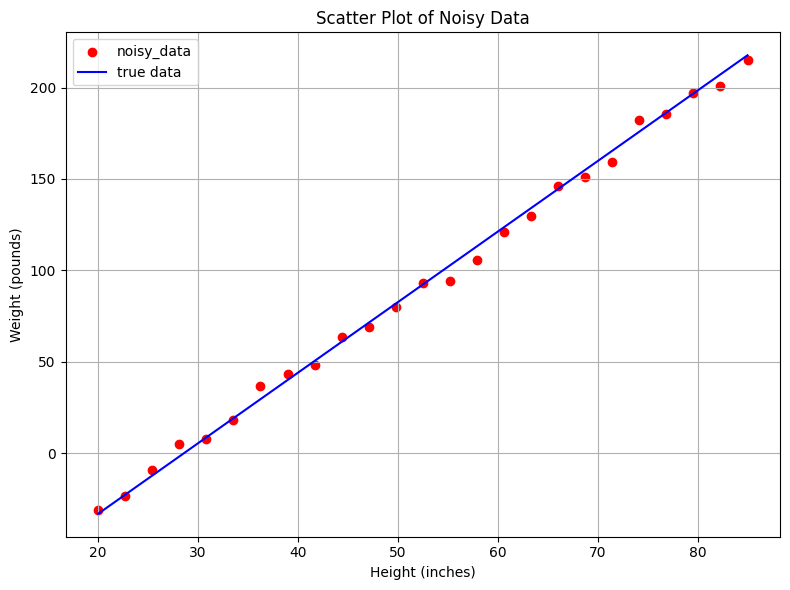

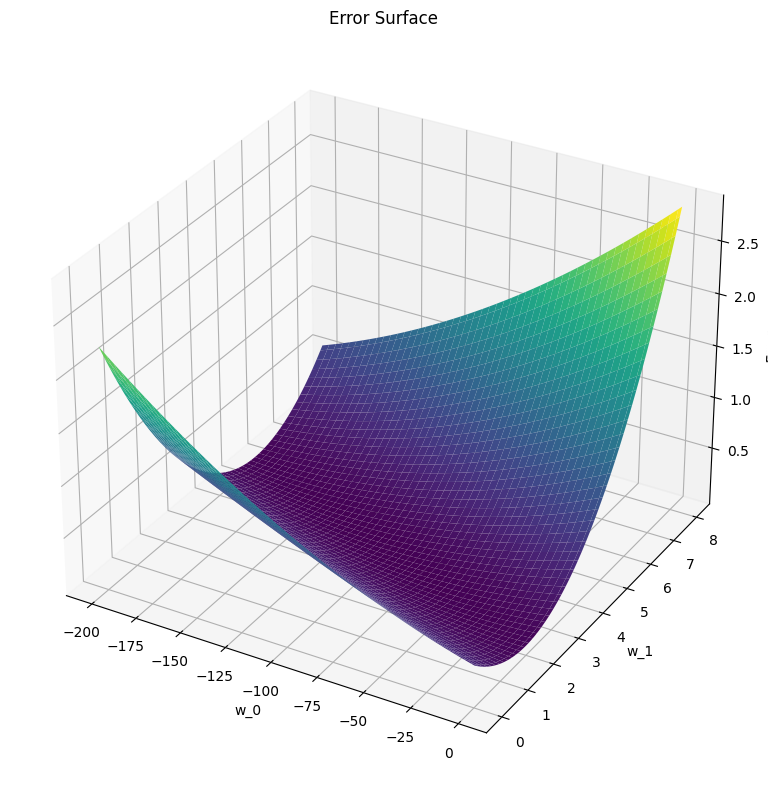

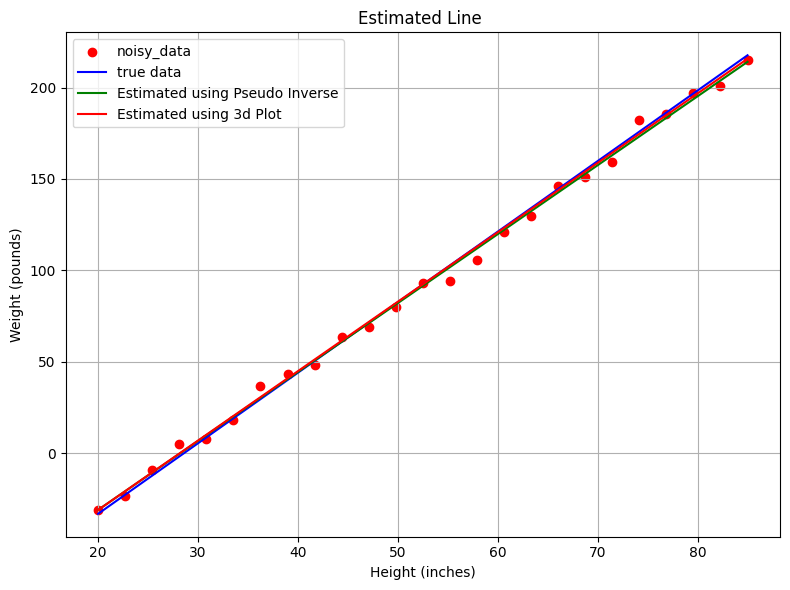

Esimated w: (-107.07070707070706 , 3.7979797979797985)
Optimal w: (-106.51781767123951 , 3.7717445219653802)


In [ ]:
#Understanding Error Surface
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

########################################
#Generate meaningfull data
########################################

np.random.seed(42)
def true_relationship(x):
  return  3.86*x -110.42
  

x_values = np.linspace(20,85,25)
t_values = true_relationship(x_values)

noise_values = np.random.normal(0,np.sqrt(20),t_values.shape)
noisy_t_values = t_values + noise_values


########################################
#Plot scatter plot of data
########################################
plt.figure(figsize =(8,6),layout='tight')
plt.scatter(x_values,noisy_t_values,color='red',label='noisy_data')
plt.plot(x_values,t_values,color='blue',label='true data')
plt.title("Scatter Plot of Noisy Data")
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.legend()
plt.grid()
plt.show()


########################################
#Weight estimation through error surface, i.e., empirically locate the minima of error surface
########################################


#Sample a bunch of w's around w_opt and compute the associated error



#Compute the error
def Error(w,t,x): #inputs : 1)weight 2)data i.e (t,x)
    #Estimate the target

  X= np.vstack((np.ones_like(x),x)).T  #Matrix of Inputs
  t= t.reshape(t.shape[0],1)
  t_hat = X@w
  error = t-t_hat
  J = np.linalg.norm(error,2)**2
  return J

#Plot 3D error surface and the corresponding contour plots
#Error surface is a function of w0 and w1


#Need to generate a  mesh grid of points to plot the surface plot of error surface

n =100 # number of points along each axis

w0 =np.linspace(-200,0,n)
w1 = np.linspace(0,8,n)

W0,W1 = np.meshgrid(w0,w1)

W = np.vstack((W0.ravel(),W1.ravel()))
E=[]
for j in range(W.shape[1]):
  w = W[:,j].reshape(2,1)
  E.append(Error(w,noisy_t_values,x_values))

E= np.array(E)

Eval = np.reshape(E,(n,n))



plt.figure(figsize =(10,8),layout='tight')
ax = plt.axes(projection = "3d")
ax.plot_surface(W0,W1,Eval,cmap='viridis')
ax.set_xlabel('w_0')
ax.set_ylabel('w_1')
ax.set_zlabel('Error')
plt.title("Error Surface")

plt.show()


#Locate the minima of the error surface


min = Eval[0][0]
min_w0 =0 
min_w1 =1
for i in range(n):
  for j in range(n):
    if Eval[i][j] < min:
      min = Eval[i][j]
      min_w0 = i
      min_w1 = j



w_est = np.array([
  W0[min_w0][min_w1],
  W1[min_w0][min_w1]
])




########################################
#Least squares approach to estimate the weights
########################################
#Complete the below linear regression function

def LinearRegression(x,t): #inputs : 1)input data i.e (x). 2)target i.e (t)
    X= np.vstack((np.ones_like(x),x)).T  #Matrix of Inputs
    w_opt = np.linalg.inv(X.T @ X) @ X.T @ (t.reshape(25,1))


    return w_opt


#Estimate optimal weight's using "LinearRegression" function


w_opt = LinearRegression(x_values,noisy_t_values)
#Estimate the targets using the input x and the estimated weights



#Plot the estimated line on top of the above scatter plot

X= np.vstack((np.ones_like(x_values),x_values)).T  #Matrix of Inputs
t_hat_pseudo_inv = X@w_opt
t_hat_3d = X@w_est







plt.figure(figsize =(8,6),layout='tight')
plt.scatter(x_values,noisy_t_values,color='red',label='noisy_data')
plt.plot(x_values,t_values,color='blue',label='true data')
plt.plot(x_values,t_hat_pseudo_inv,color='green',label='Estimated using Pseudo Inverse')
plt.plot(x_values,t_hat_3d,color='red',label='Estimated using 3d Plot')
plt.title("Estimated Line ")
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.legend()
plt.grid()
plt.show()




########################################
#Compare the estimated weight's using least squares approach with the error surface approach
########################################







print(f"Esimated w: ({W0[min_w0][min_w1]} , {W1[min_w0][min_w1]})")
print(f"Optimal w: ({w_opt[0][0]} , {w_opt[1][0]})")


<b> Report your observations </b>

1. Estimated w and optimal w obtained from both the appraoches are almost similar

2.

3.



<b> Part - (2) : Understanding model order and overfitting  </b>

(a). Generate  20  data  points  from $t_{n} = sin(2πx_{n}) + e_{n}$, where $x_{n} \in [0,1] $ and $e_{n} \thicksim \mathcal{N} (0,0.1)$ , and divide them into two sets, a training set and a testing set, with each set containing 10 points <br>

(b). Fit  an $M^{th}$ degree  polynomial  to  the  training  data  using  least  squares approach, i.e.,
$$\hat{t_{n}} = w_{0} + w_{1}x + .... +  w_{m}x^{m} + ... + w_{M}x^{M} $$


Use the estimated parameter vector $\textbf{w}$, to predict the target values in training and testing datasets.  Plot the root mean squared error associated with each dataset, for M=0,1,...,9. Explain your results. <br>

(c) Increase the size of the training dataset to 100 points, and repeat (b). <br>

(d) Add a $l_{2}$ regularization term to the objective function in (b) and repeat (b) and (c).  Study the affect of Lagrange multiplier λ on the root mean squared error of the training and testing datasets <br>

(e) Modify the function in (a) to $t_{n}=5+sin(2πx_{n})+e_{n}$ to study the effect of regularizing the bias coefficient $w_{0}$.

(f) Report all your observations

Training Error [1.3627636032886563, 1.6388693935565073, 1.6415773652596373, 1.649384863549355, 1.6950597876620224, 1.744187047114348, 1.7471542111756557, 1.7604525588088453, 1.8767866051764817]
Test Error [4.6256021452725165, 10.809541515963343, 18.34333276808788, 53.717600305149894, 1006.6454829177852, 8476.435980952514, 5695.378285589172, 280984.982964366, 10331260.39926296]


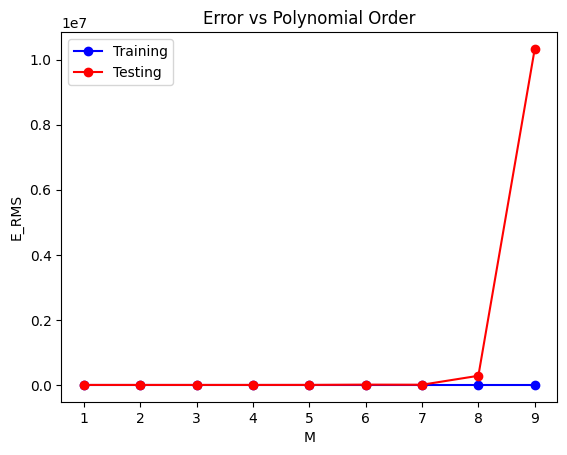

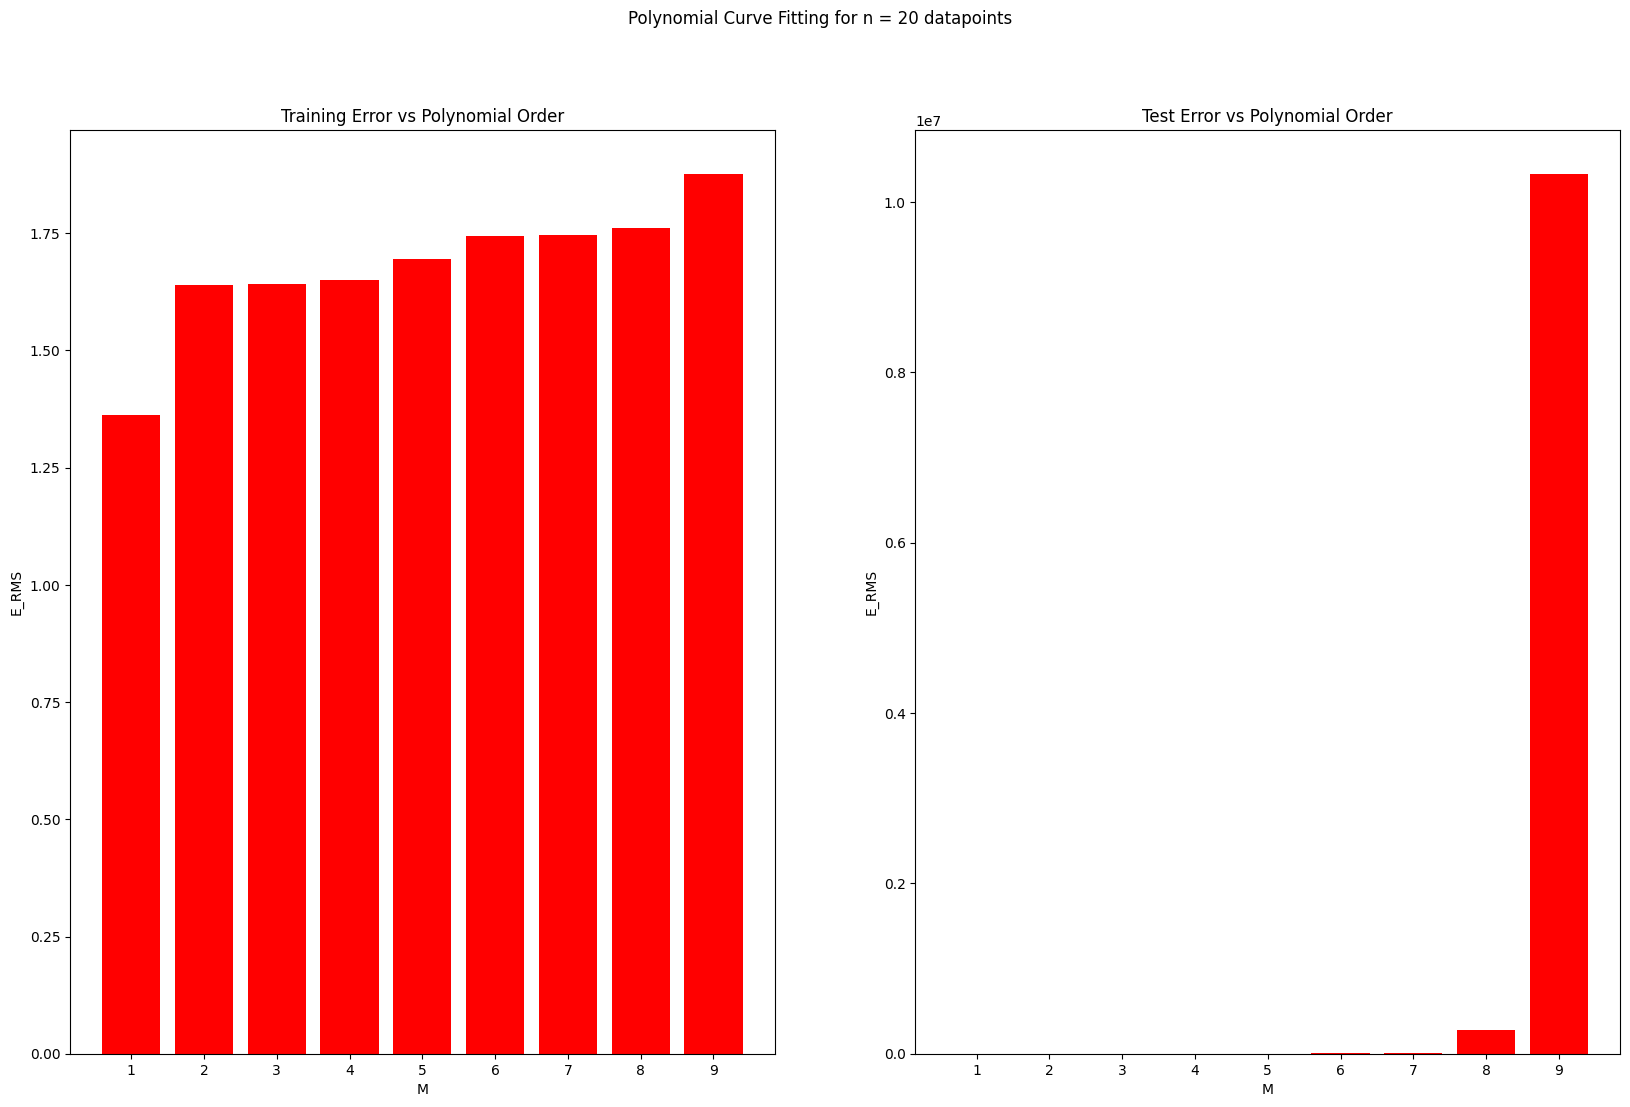

Training Error [2.905932339860579, 3.437717006639419, 3.4414971923469477, 3.4434039372824095, 3.4777046298846854, 3.482189830721936, 3.502817093395642, 3.505818566677153, 3.5451010034799606]
Test Error [8.845847772415892, 22.072734887720188, 10.302962647545508, 53.682984716742375, 933.3581053797894, 2855.92608640413, 19756.179785545773, 67542.62807362215, 903739.7536128782]


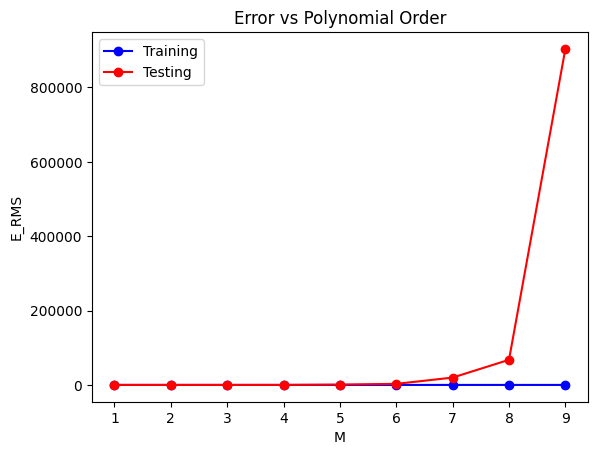

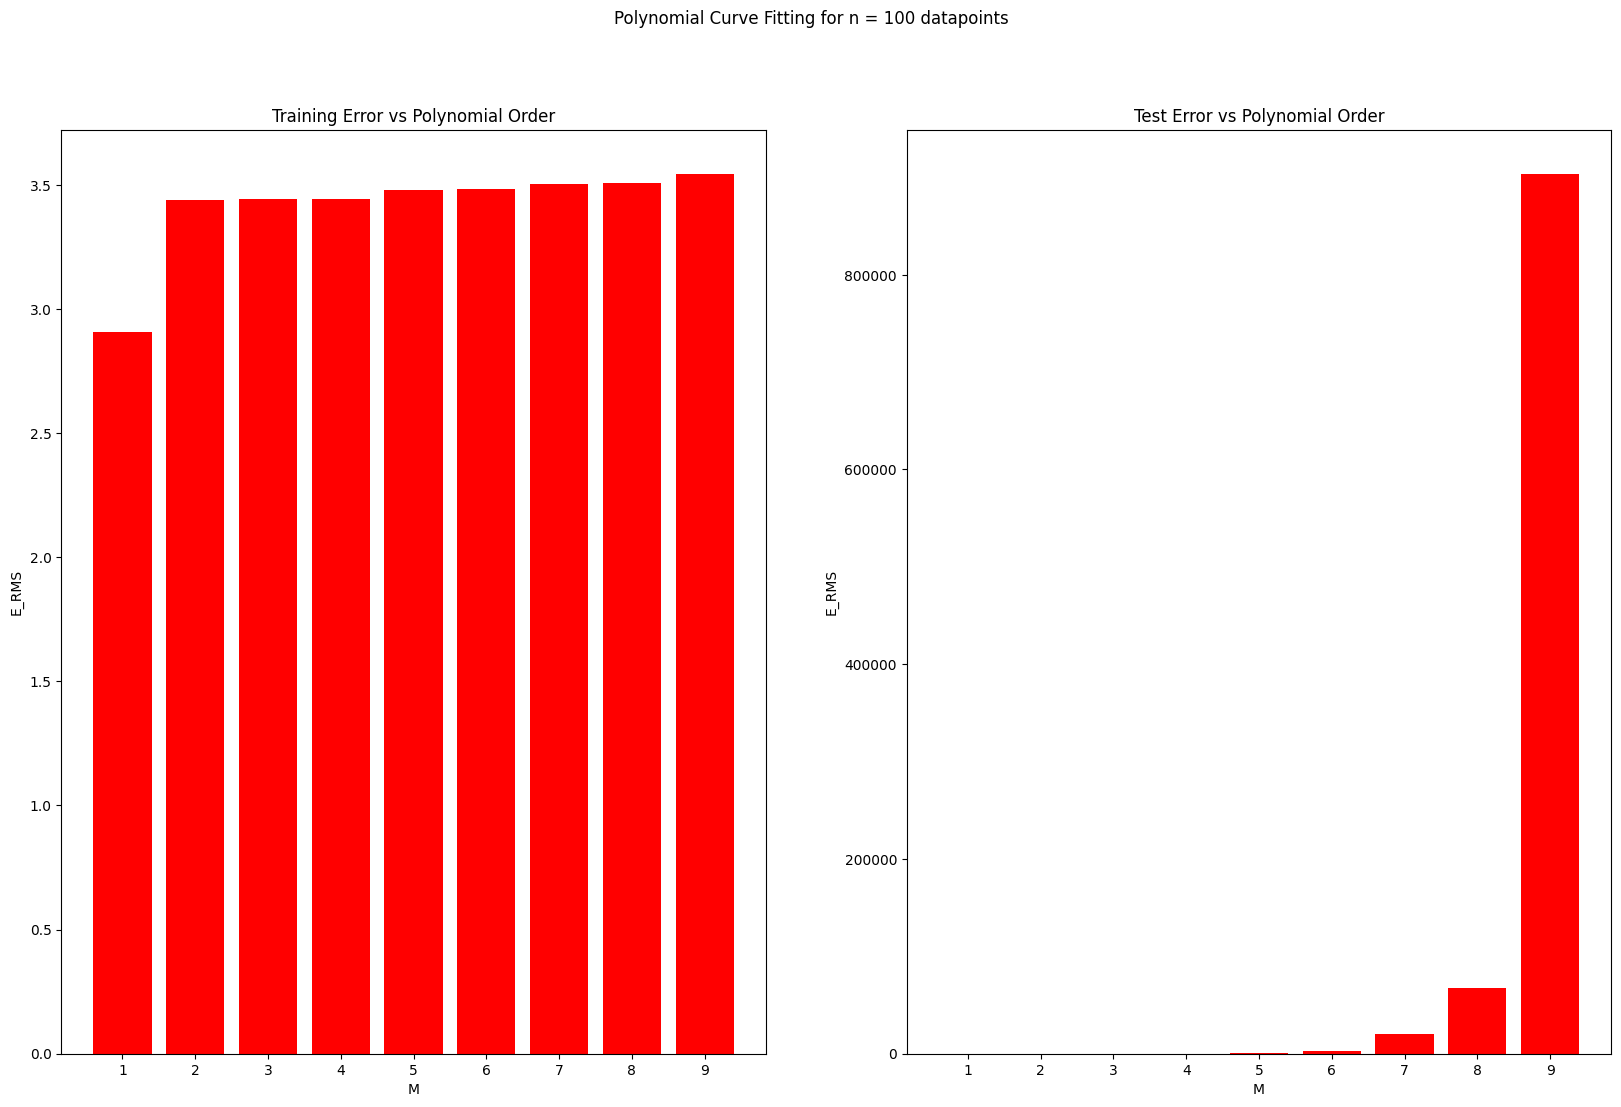

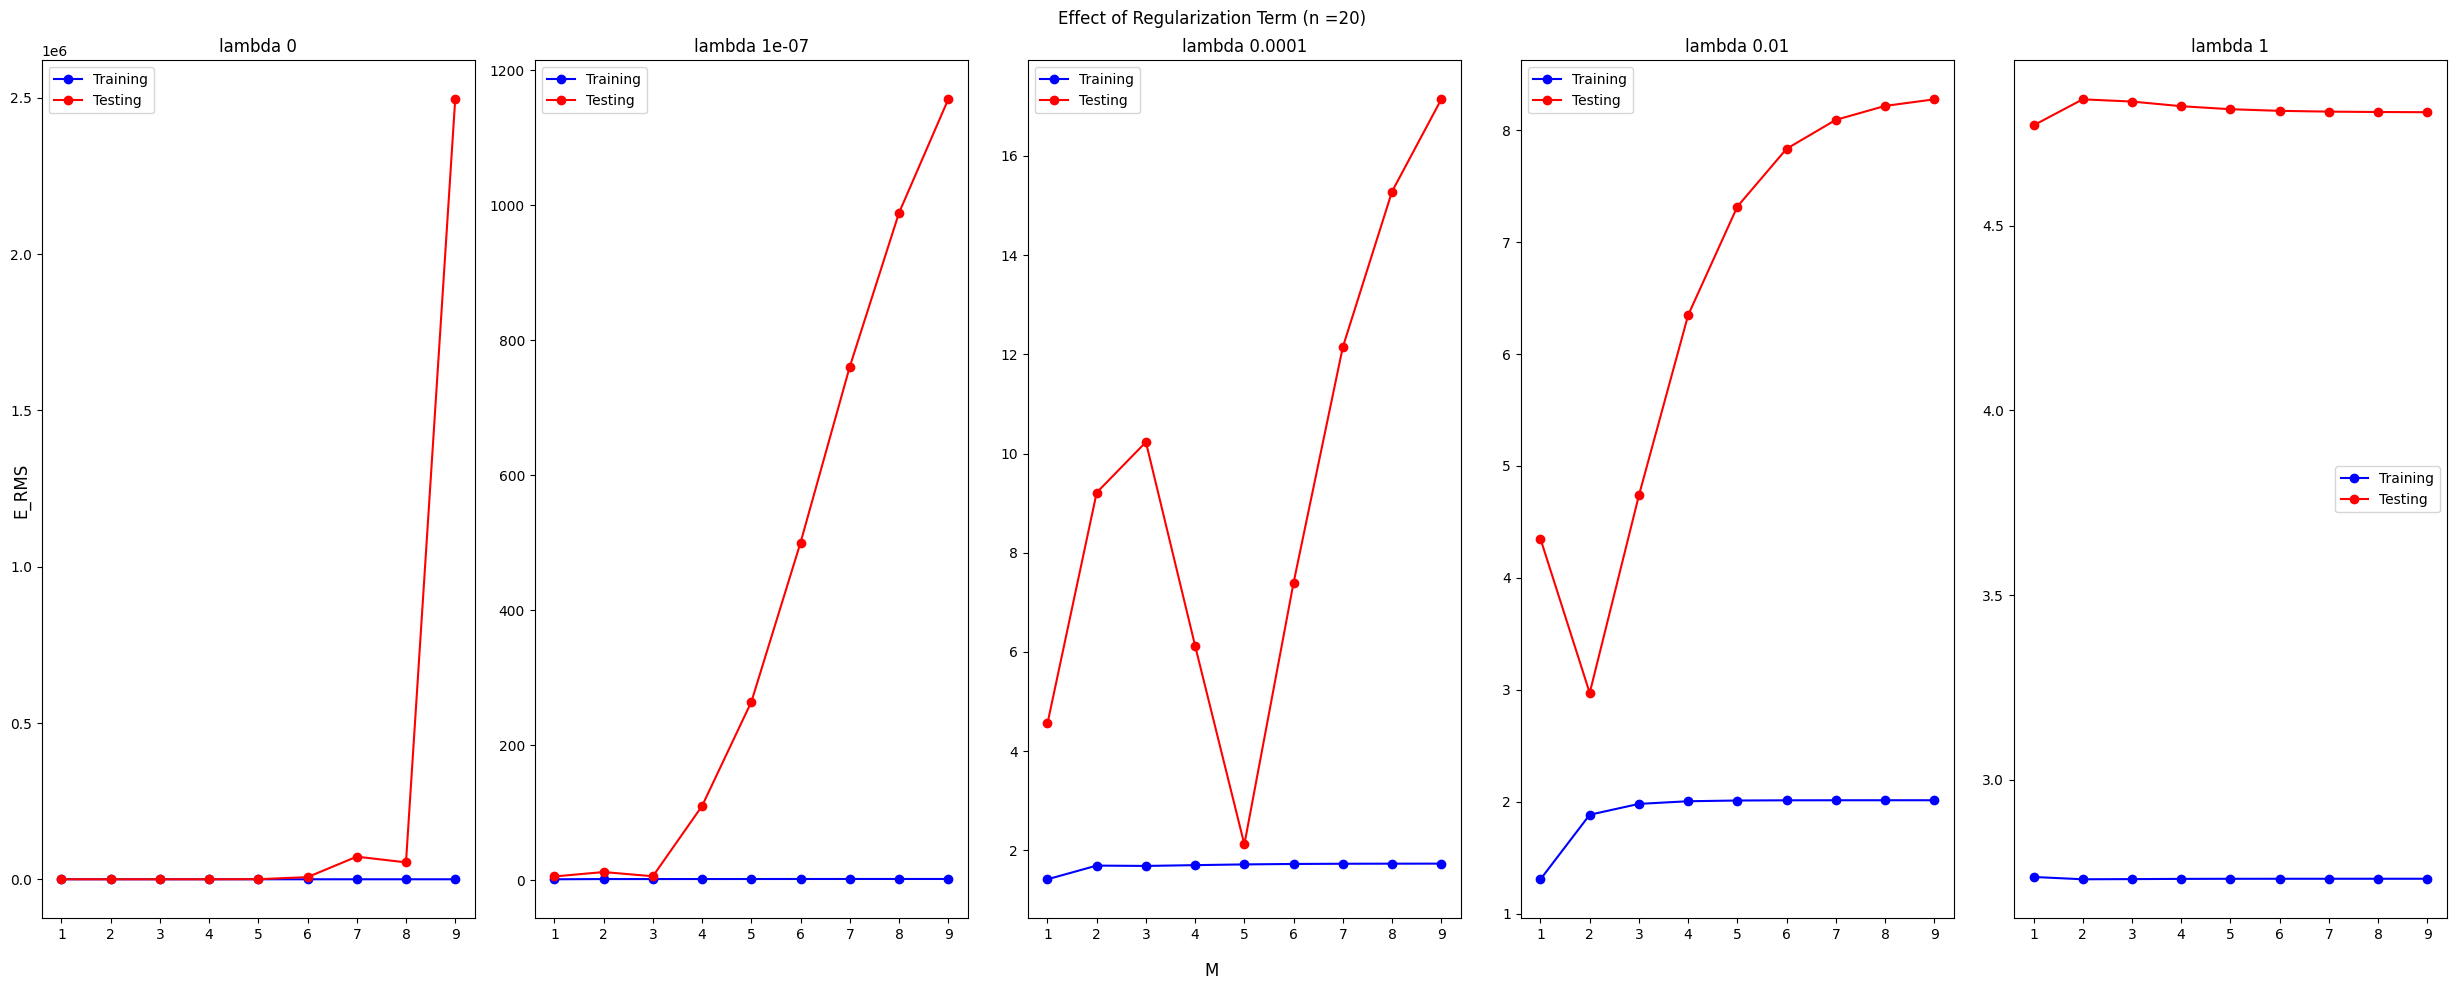

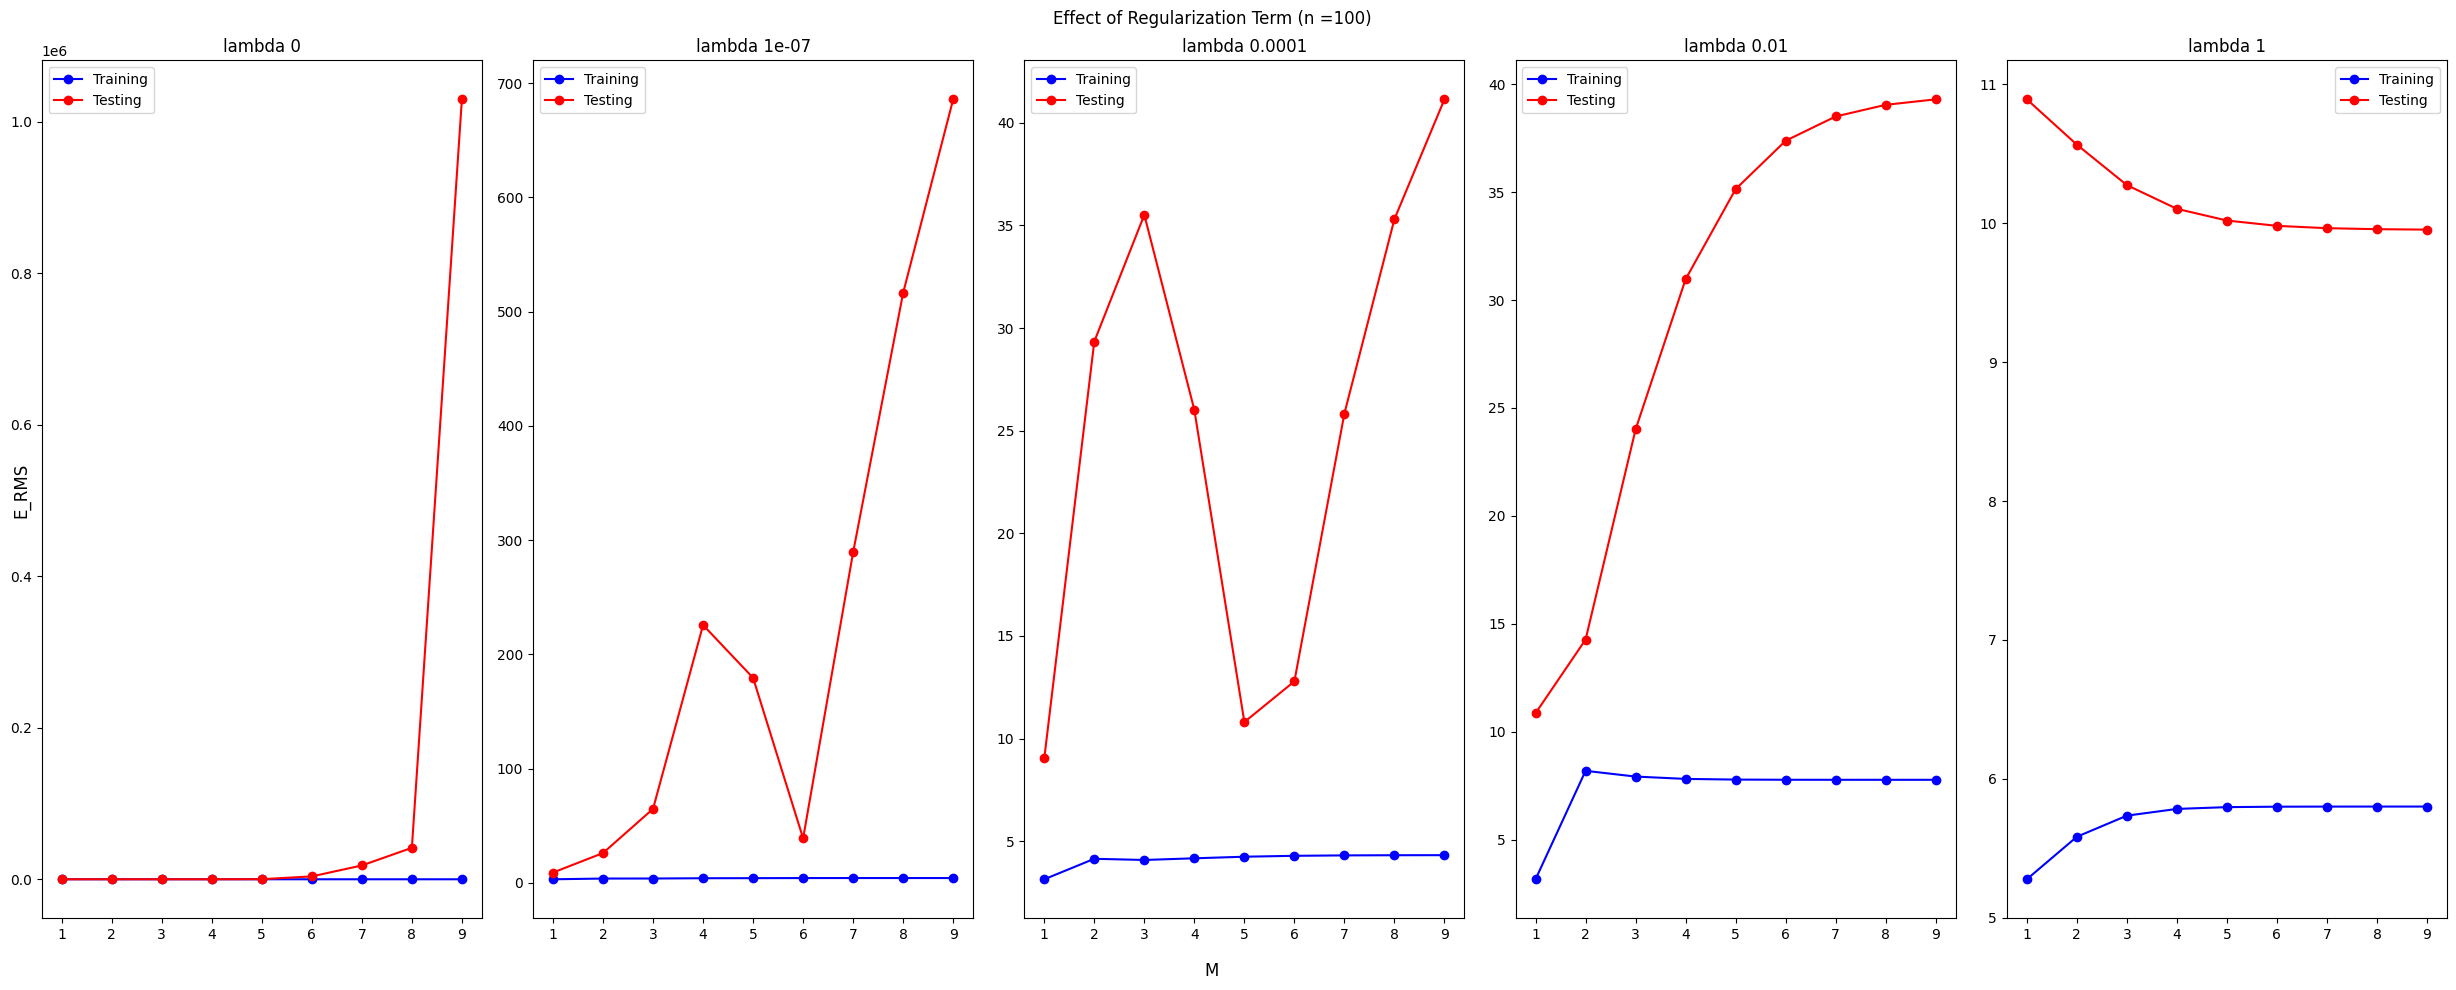

In [ ]:
#Understanding model order and overfitting
########################################
#Generate 20 data points
########################################

# n = 20
def generateData(n):

  x = np.linspace(0,1,n)
  noise = np.random.normal(0,np.sqrt(0.1),n)
  t = np.sin(2*np.pi * x) + noise
  return x,t

def splitData(x,t,n):

  x_train = x[:n]
  t_train = t[:n]

  x_test = x[n:]
  t_test = t[n:]
  return x_train,t_train,x_test,t_test

# x,t =generateData(n)
# x_train,t_train,x_test,t_test = splitData(x,t,n//2)



#Obtain train and test splits



########################################
#Fitting Mth degree polynomial using least squares approach
########################################

M=10
def PolynomialFit(X_train,Y_train,M,lamda=0): #(training data, trining targets, Model order, Regularization coefficient)
    #Transform the data using polynomial kernel

    X = X_train.reshape(-1,1)**np.arange(M+1)



    #Find Pseudo inverse solution
    w_opt = np.linalg.inv(X.T @ X + lamda* np.identity(M+1,dtype=int)) @ X.T @ (Y_train.reshape(Y_train.shape[0],1))

    #return the weight vector
    return w_opt

# w_est = PolynomialFit(x_train,t_train,M)
# print(f'Estimated Weight Wector: {w_est}')


def PolynomialPred(w_est,X_train,X_test,M): #(weight,training data, testing data, training targets, testing targets)
    #Estimate the targets for both training and testing data

    phi_X_train = X_train.reshape(-1,1)**np.arange(M+1)
    t_train_hat = phi_X_train@w_est



    phi_X_test = X_test.reshape(-1,1)**np.arange(M+1)
    t_test_hat = phi_X_test@w_est

    # #Return training and testing predictions
    return t_train_hat,t_test_hat


def PolynomialPred_Error(t_train,t_train_hat,t_test,t_test_hat,lamda = 0,West= 0): #(weight,training data, testing data, training targets, testing targets)
    #Estimate the targets for both training and testing data
    TrainError =  np.sqrt( (np.sum(np.square(t_train-t_train_hat) + lamda * np.linalg.norm(West)**2))/t_train.shape[0])
    TestError =  np.sqrt( (np.sum(np.square(t_test-t_test_hat) + lamda * np.linalg.norm(West)**2))/t_test.shape[0])


    #Return training and testing error
    return TrainError,TestError
# PolynomialPred_Error(t_train,t_train_hat,t_test,t_test_hat)

#Iterate through range of M values
max_order = 9
M_range=list(range(1,max_order+1))

def experiment(n,M_range,lamda = 0):


  x,t =generateData(n)
  x_train,t_train,x_test,t_test = splitData(x,t,n//2)


  TrError = []
  TeError = []
  for M in M_range:
      # print("Expermiment for M  value ",M)
      # Fit Mth order polynomial i.e estimate optimal w. Use the function "PolynomialFit"
      w_est = PolynomialFit(x_train,t_train,M,lamda)

      # Predict training and testing targets
      t_train_hat,t_test_hat = PolynomialPred(w_est,x_train,x_test,M)


      # Predict errors on both training and testing data using estimated w. Use the function "PolynomialPred_Error"
      trainError,testError = PolynomialPred_Error(t_train,t_train_hat,t_test,t_test_hat,lamda,w_est)


      # Store them for plotting
      TrError.append(trainError)
      TeError.append(testError)
  return TrError,TeError




#Plot training and testing estimates alogwith the original targets
TrError,TeError = experiment(20,M_range)
print(f'Training Error {TrError}')
print(f'Test Error {TeError}')


#Plot training error vs polynomial order, and testing error vs polynomial order

plt.plot(M_range,TrError,marker='o',color='blue',label='Training')
plt.plot(M_range,TeError,marker='o',color='red',label='Testing')
plt.title(("Error vs Polynomial Order"))
plt.legend()
plt.xlabel('M')
plt.ylabel('E_RMS')
plt.show()


plt.figure(figsize = (20,12))
plt.suptitle("Polynomial Curve Fitting for n = 20 datapoints")
plt.subplot(1,2,1)
plt.bar(M_range,TrError,color='red')
plt.title(("Training Error vs Polynomial Order"))
plt.xticks(M_range)
plt.xlabel('M')
plt.ylabel('E_RMS')



plt.subplot(1,2,2)
plt.bar(M_range,TeError,color='red')
plt.title(("Test Error vs Polynomial Order"))
plt.xticks(M_range)
plt.xlabel('M')
plt.ylabel('E_RMS')
plt.show()

########################################
#Increase the size of training data set to 100 points and repeat the experiments
########################################



TrError,TeError = experiment(100,M_range)
print(f'Training Error {TrError}')
print(f'Test Error {TeError}')

plt.plot(M_range,TrError,marker='o',color='blue',label='Training')
plt.plot(M_range,TeError,marker='o',color='red',label='Testing')
plt.title(("Error vs Polynomial Order"))
plt.legend()
plt.xlabel('M')
plt.ylabel('E_RMS')
plt.show()




plt.figure(figsize = (20,12))
plt.suptitle("Polynomial Curve Fitting for n = 100 datapoints")
plt.subplot(1,2,1)
plt.bar(M_range,TrError,color='red')
plt.title(("Training Error vs Polynomial Order"))
plt.xticks(M_range)
plt.xlabel('M')
plt.ylabel('E_RMS')



plt.subplot(1,2,2)
plt.bar(M_range,TeError,color='red')
plt.title(("Test Error vs Polynomial Order"))
plt.xticks(M_range)
plt.xlabel('M')
plt.ylabel('E_RMS')
plt.show()





########################################
#Effect of regularization
########################################
#Consider a set of lambda's. For example: lamdas = [0, 1e-7 , 1e-4, 1e-2, 1]
#Repeat the experiments, i.e., plot the prediction and error in predictions with respect to model order. Contrast these results with those obtained without regularization.



lamdas = [0, 1e-7 , 1e-4, 1e-2, 1]
n = len(lamdas)

fig,axs = plt.subplots(1,n,figsize=(25,10),layout='tight')

for i,lamda in enumerate(lamdas):
  TrError,TeError = experiment(20,M_range,lamda)
  
  axs[i].set_title(f'lambda {lamda}')
  axs[i].plot(M_range,TrError,marker='o',color='blue',label='Training')
  axs[i].plot(M_range,TeError,marker='o',color='red',label='Testing')  
  
  axs[i].legend()
  



plt.suptitle("Effect of Regularization Term (n =20)")
fig.supxlabel('M')
fig.supylabel('E_RMS')

plt.show()# plt.legend()







fig,axs = plt.subplots(1,n,figsize=(25,10),layout='tight')

for i,lamda in enumerate(lamdas):
  TrError,TeError = experiment(100,M_range,lamda)
  axs[i].set_title(f'lambda {lamda}')
  axs[i].plot(M_range,TrError,marker='o',color='blue',label='Training')
  axs[i].plot(M_range,TeError,marker='o',color='red',label='Testing')  
  
  axs[i].legend()
  



plt.suptitle("Effect of Regularization Term (n =100)")
fig.supxlabel('M')
fig.supylabel('E_RMS')

plt.show()# plt.legend()








########################################
#Effect of bias regularization
########################################
#Modify the function i.e include bias
#Generate data
n=20
x = np.linspace(0,1,n)
noise = np.random.normal(0,np.sqrt(0.1),n)
t = 5+ np.sin(2*np.pi * x) + noise

x_train,t_train,x_test,t_test = splitData(x,t,n//2)



fig,axs = plt.subplots(1,n,figsize=(25,10),layout='tight')

for i,lamda in enumerate(lamdas):
  TrError,TeError = experiment(20,M_range,lamda)
  
  axs[i].set_title(f'lambda {lamda}')
  axs[i].plot(M_range,TrError,marker='o',color='blue',label='Training')
  axs[i].plot(M_range,TeError,marker='o',color='red',label='Testing')  
  
  axs[i].legend()
  



plt.suptitle("Effect of Regularization Term (n =20)")
fig.supxlabel('M')
fig.supylabel('E_RMS')

plt.show()# plt.legend()



#Estimate the polynomial with and without regularization constraint



#Compare the two estimated polynomials and report the observations


<b> Report your observations </b>

1.

2.

3.



<b> Part - (3) : Understanding the choice of kernel  </b>


(a). Generate 100 data points from $t_{n}=sin(2πx_{n})+e_{n}$, where $x_{n} \in [0 1]$ and $e_{n} \thicksim \mathcal{N}(0,0.1)$, and divide them into two sets, a training set and a testing test each containing 50 points.  Fit an $M^{th}$ degree polynomial using polynomial,Gaussian and sigmoidal kernels, and study the goodness of fit in each case, for different model orders M

(b). Repeat (a) by modifying the target function to <br>
<center> $t_{n} = $ $\begin{cases}
 \text{sinusoid} + e_{n} , \;\; where \;\; x  \in [0,1) \\
 \text{triangle} + e_{n} , \;\; where \;\; x  \in [1,2) \\
 \text{Gaussian} + e_{n} , \;\; where \;\; x  \in [2,3) \\
\end{cases}$ </center>

Clearly discuss your observations/results for each of the three kernels.

(c). Report all your observations

In [4]:
from scipy.special  import expit  # For Sigmoid Functionfrom scipy.special  import expit  # For Sigmoid Function


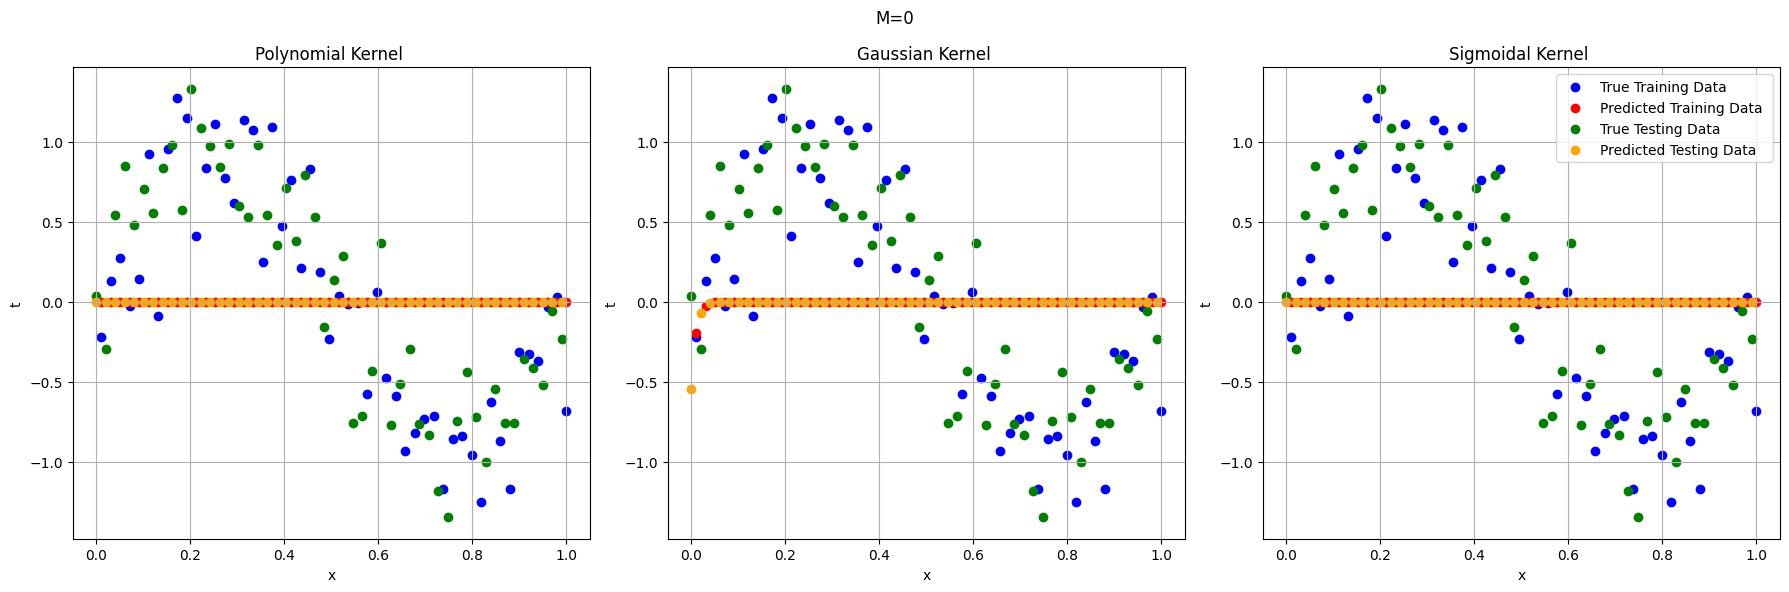

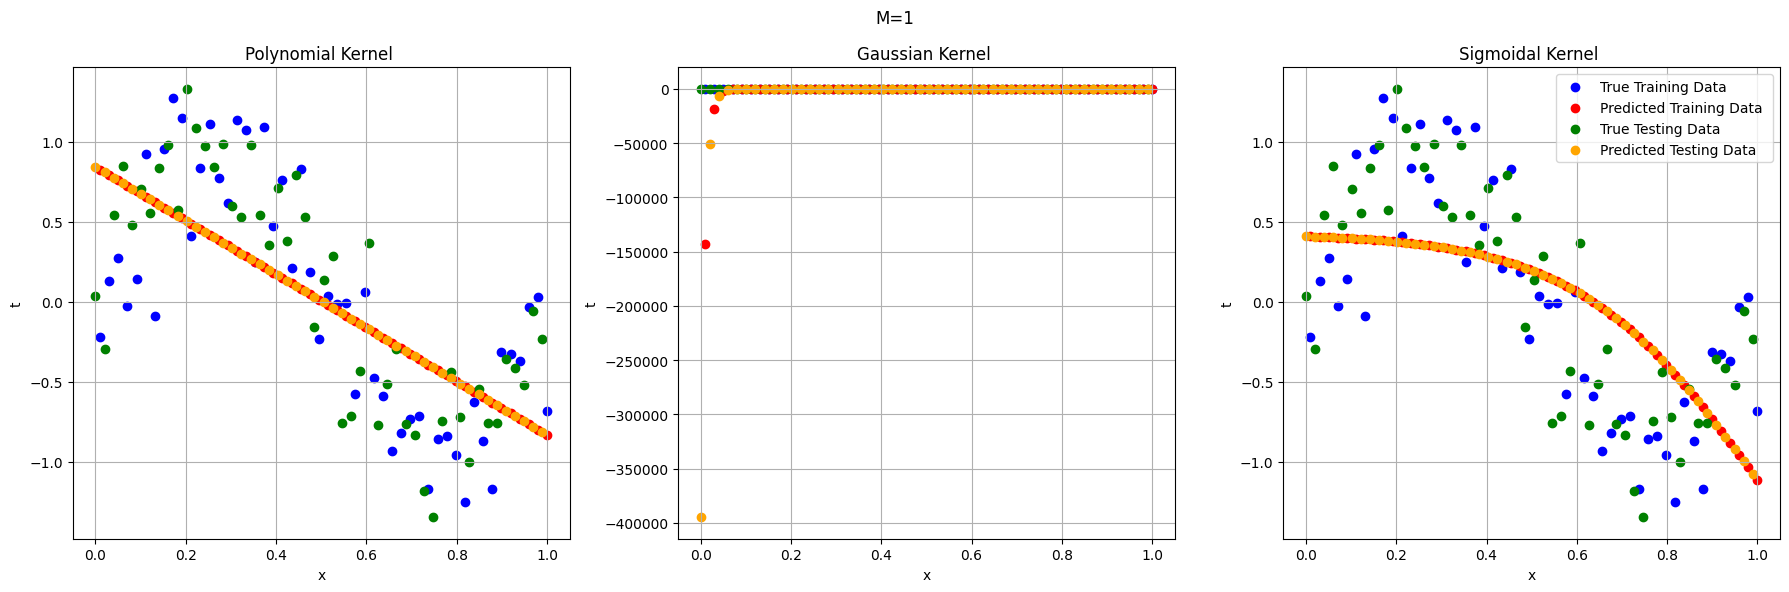

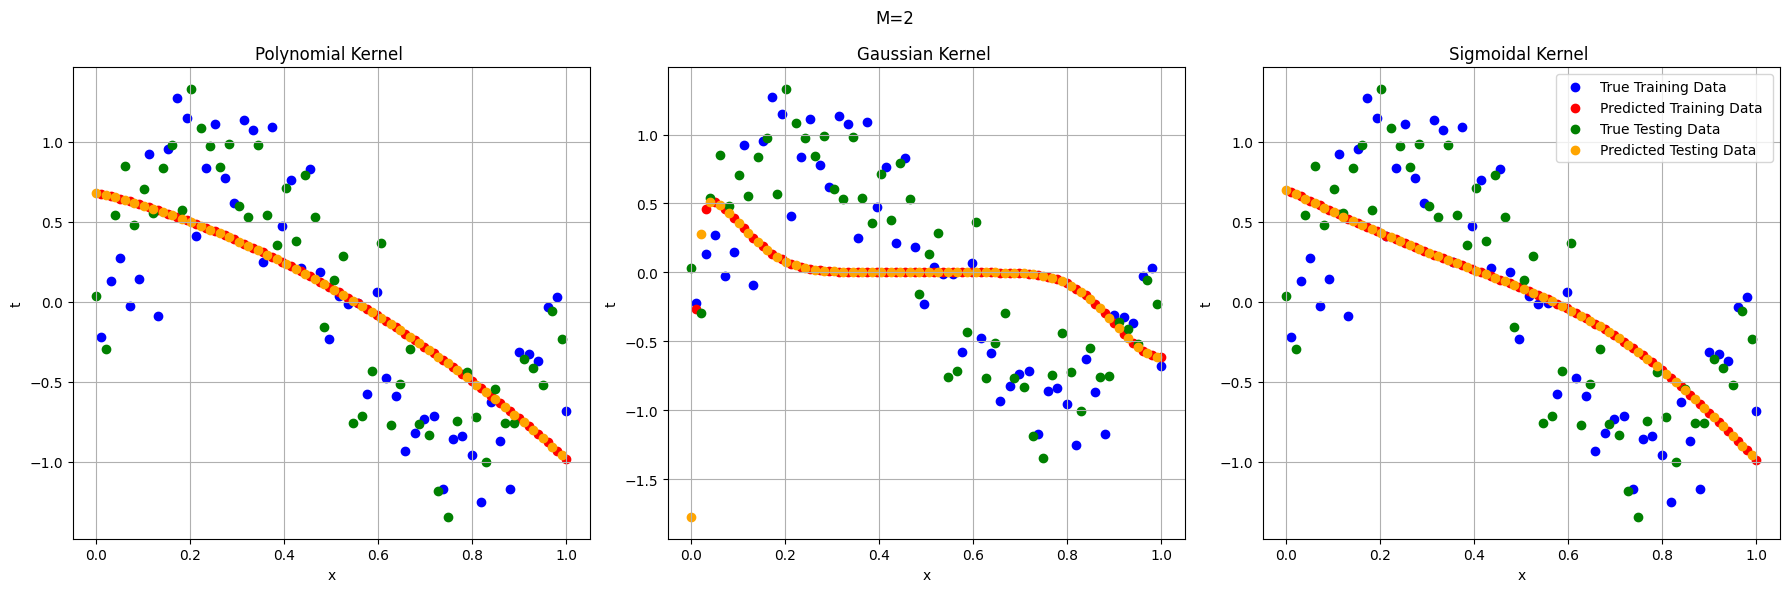

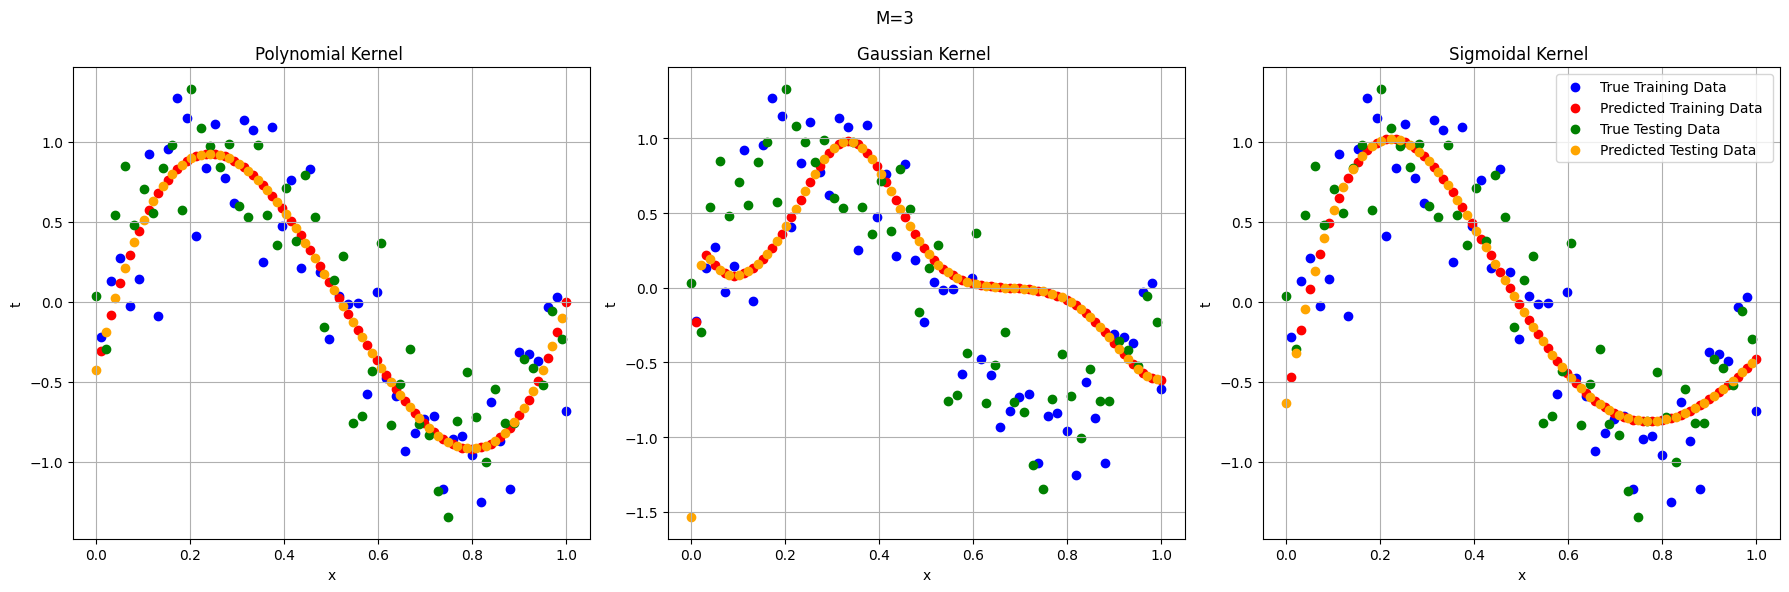

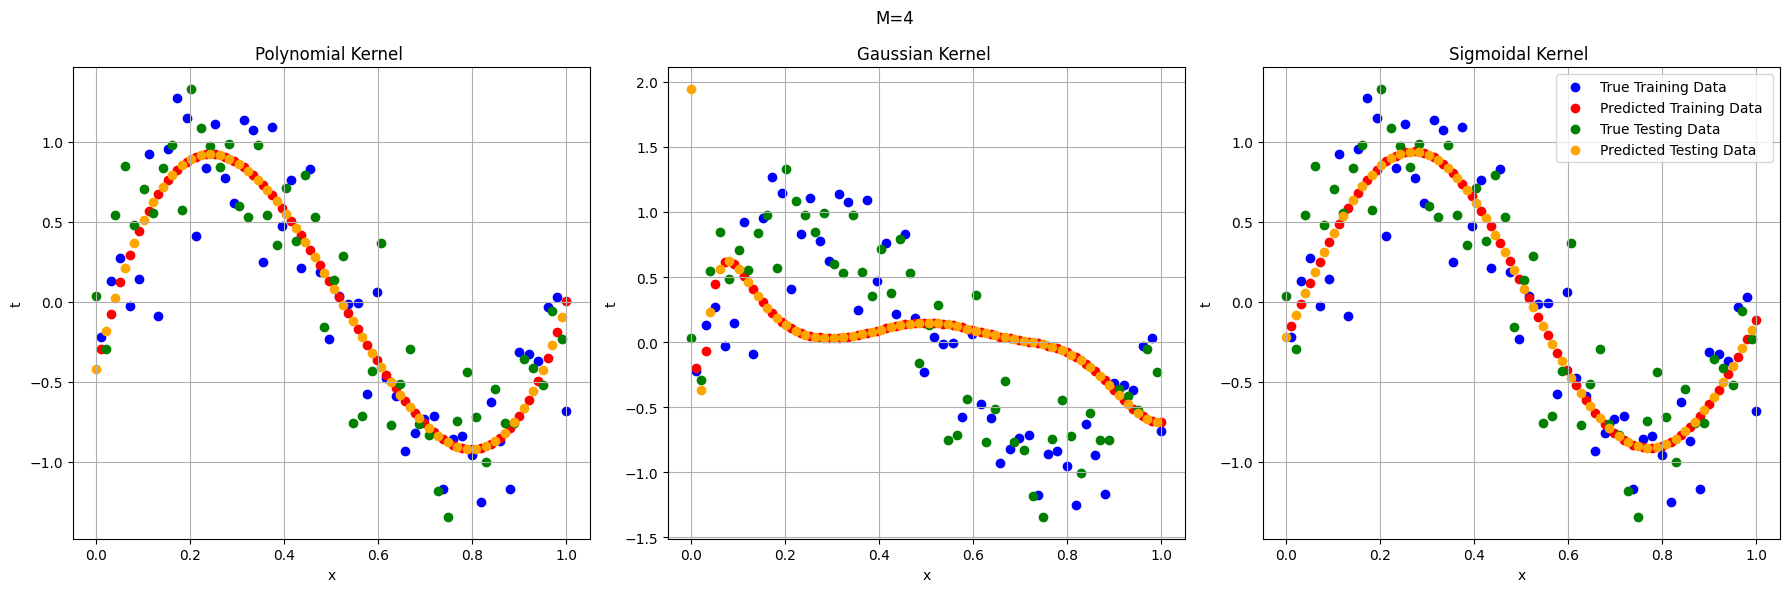

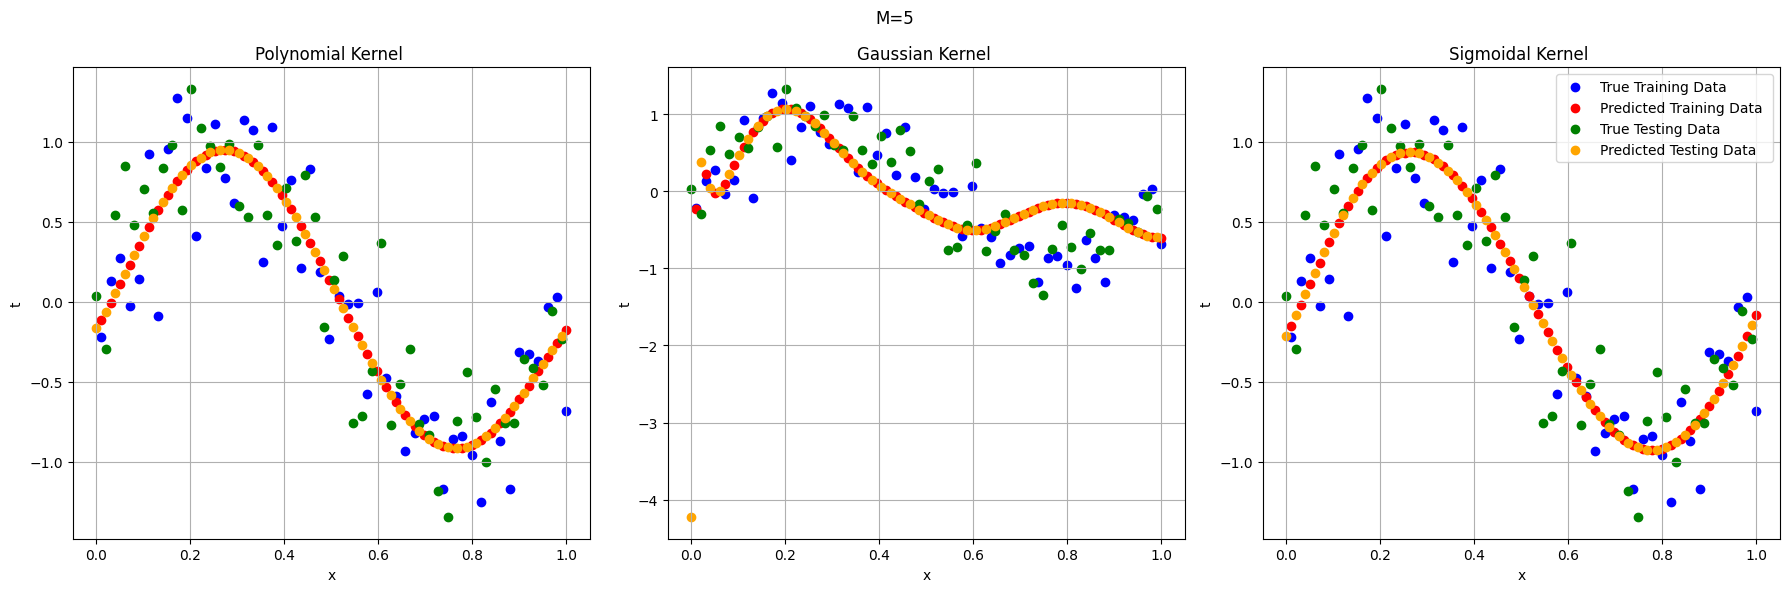

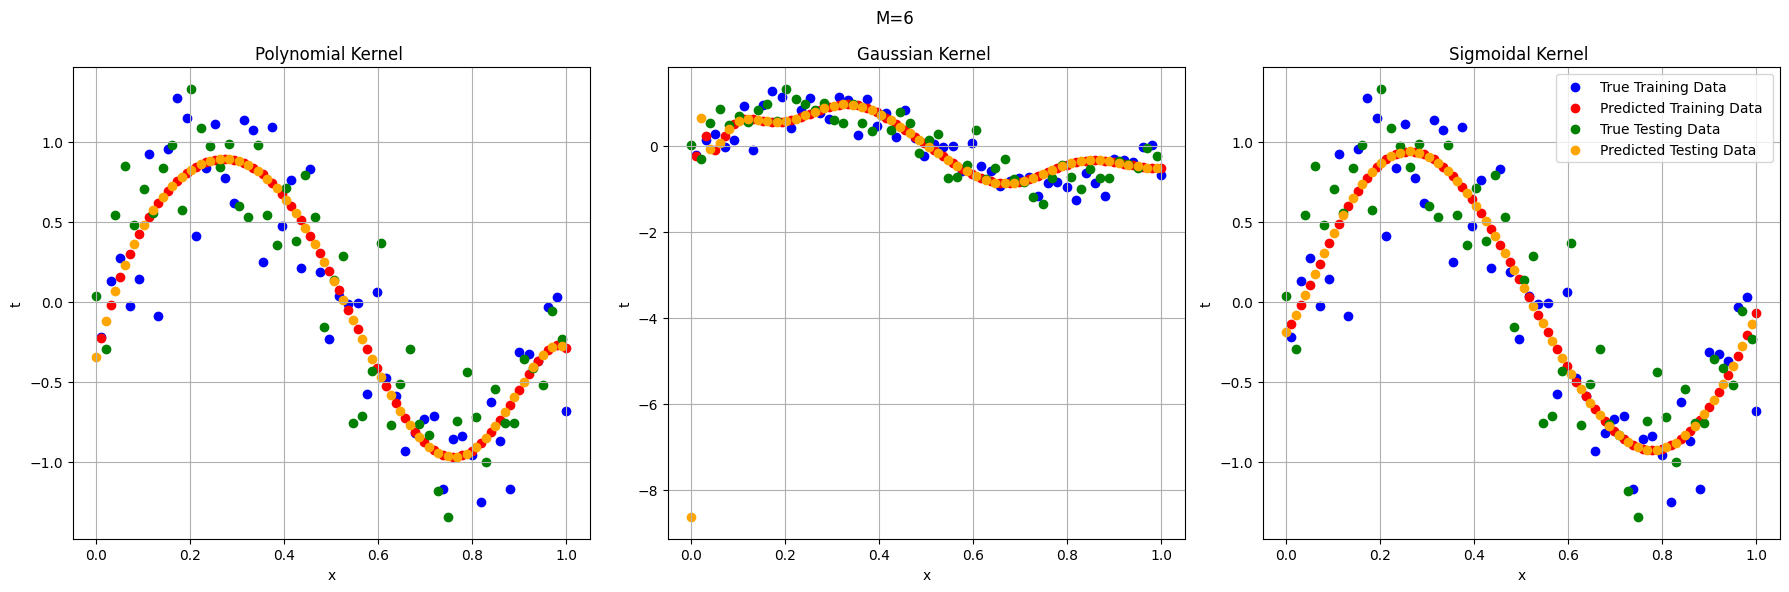

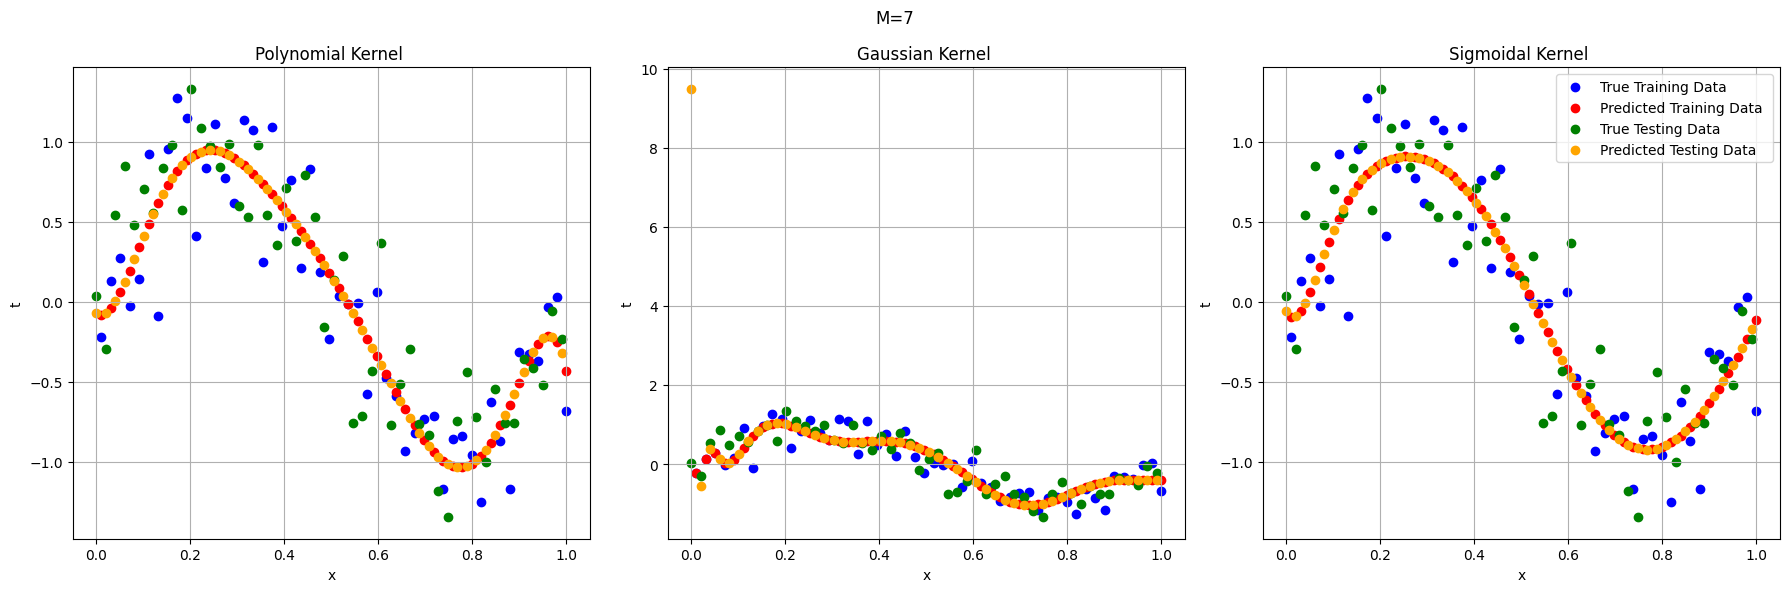

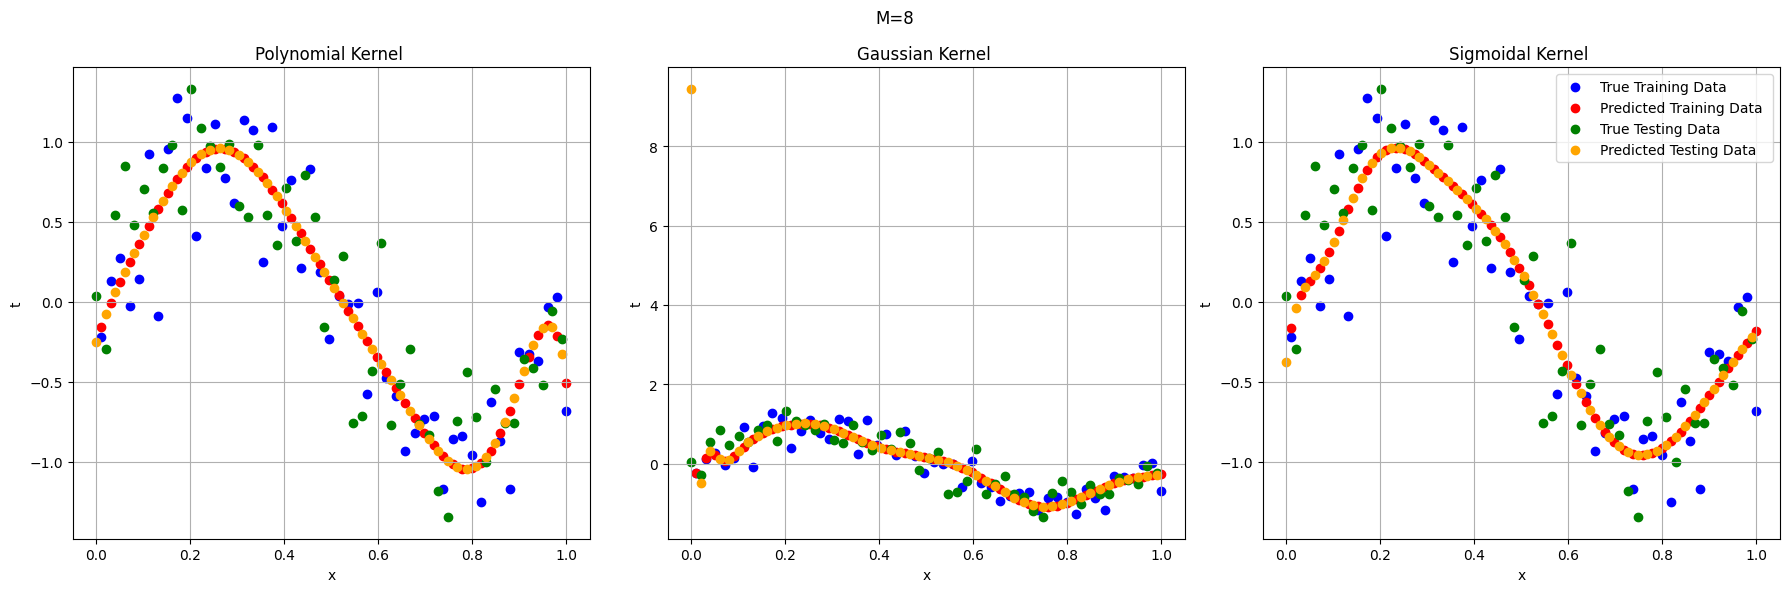

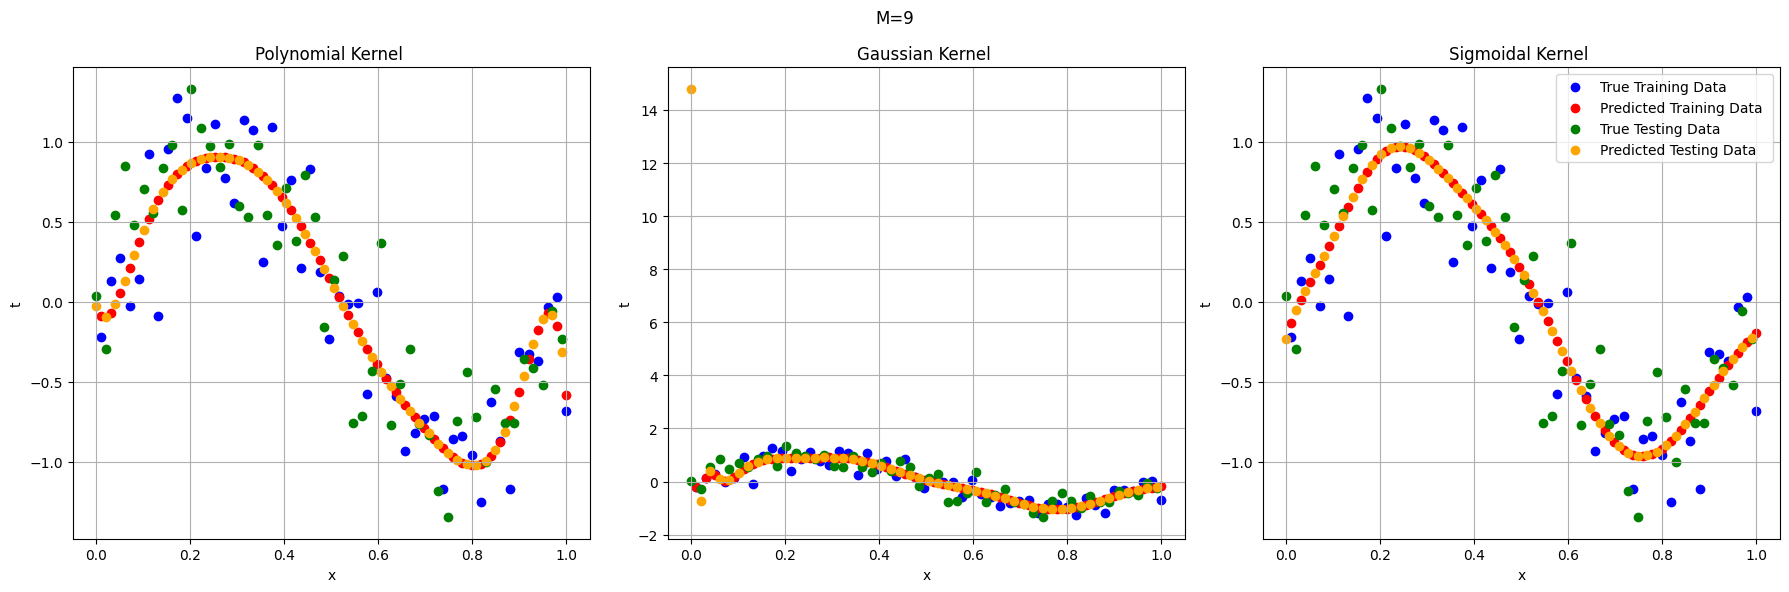

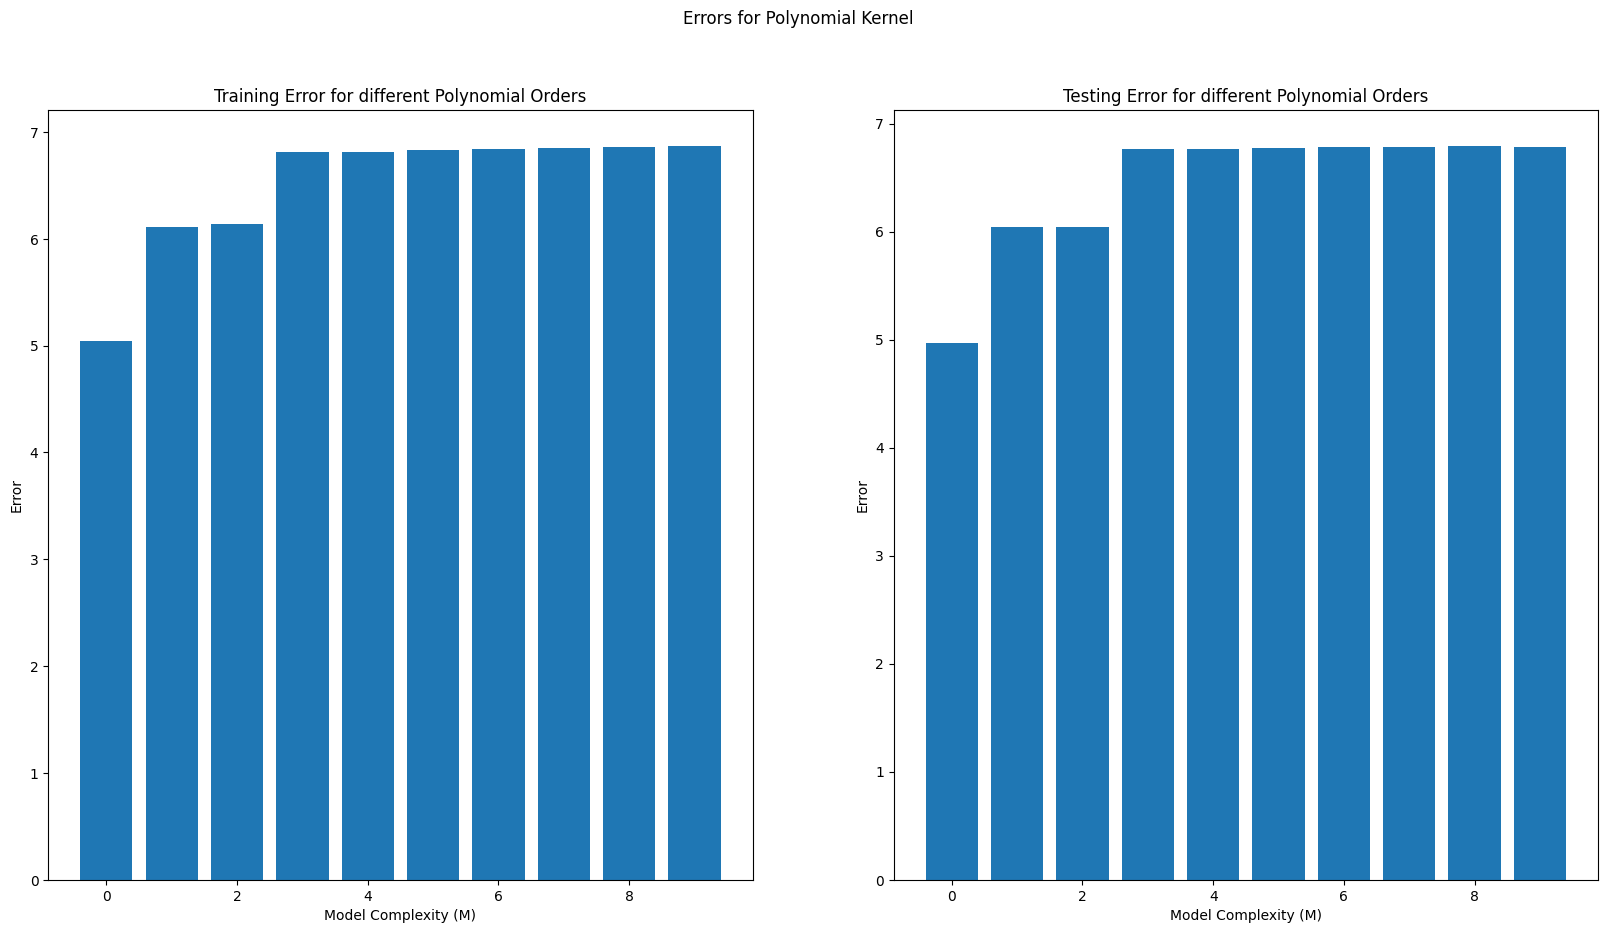

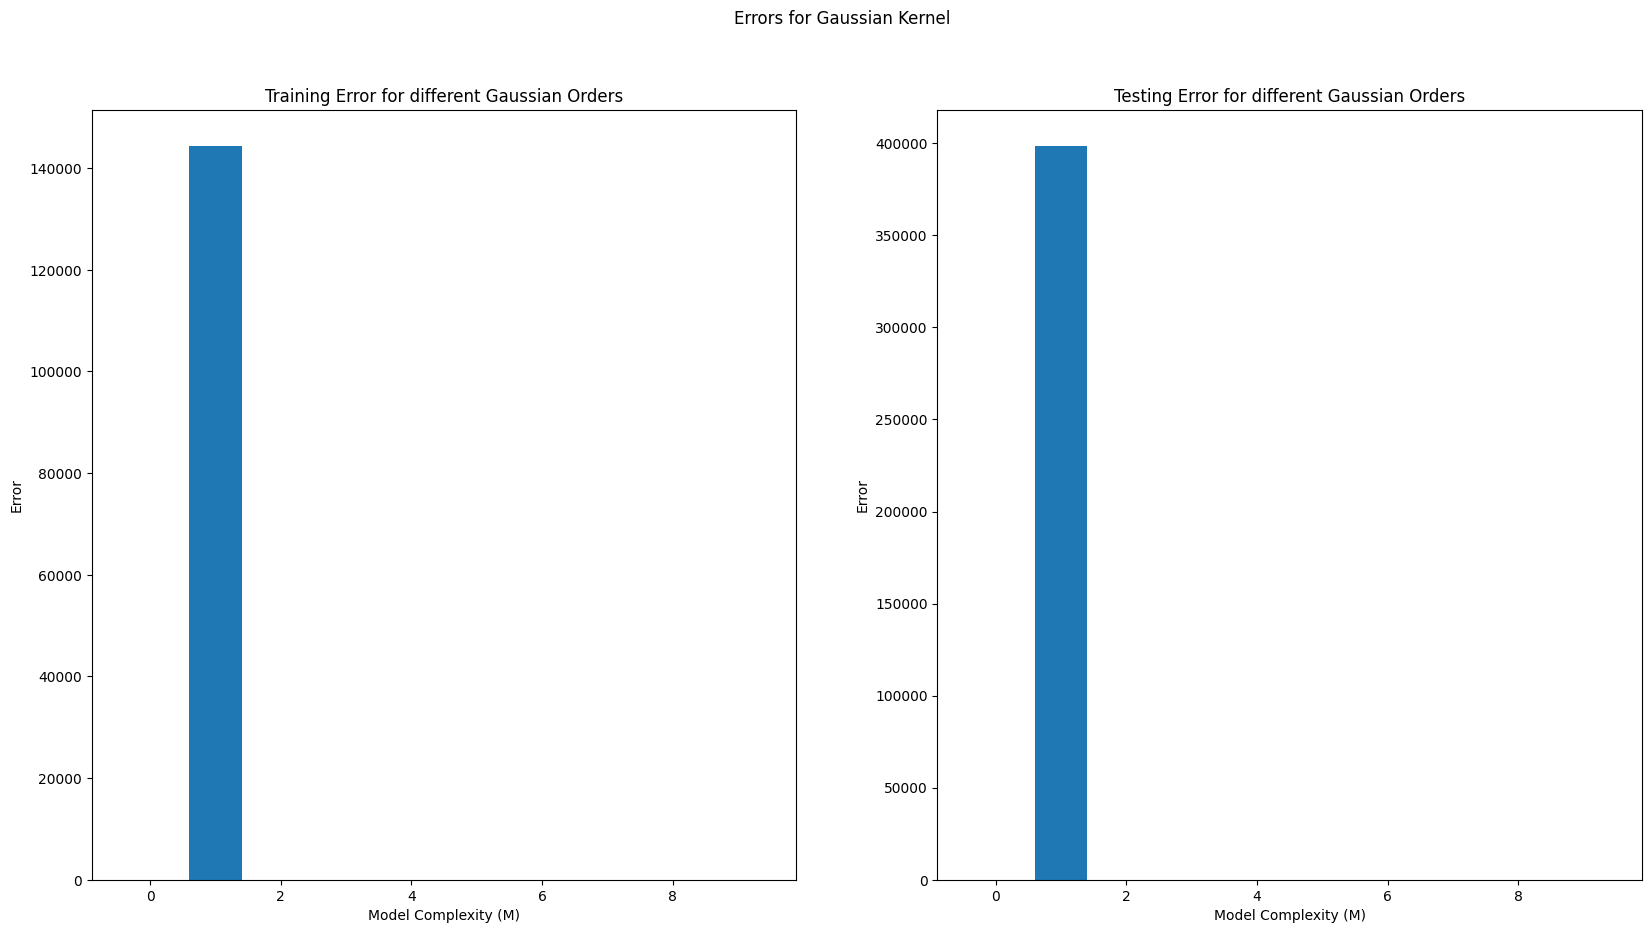

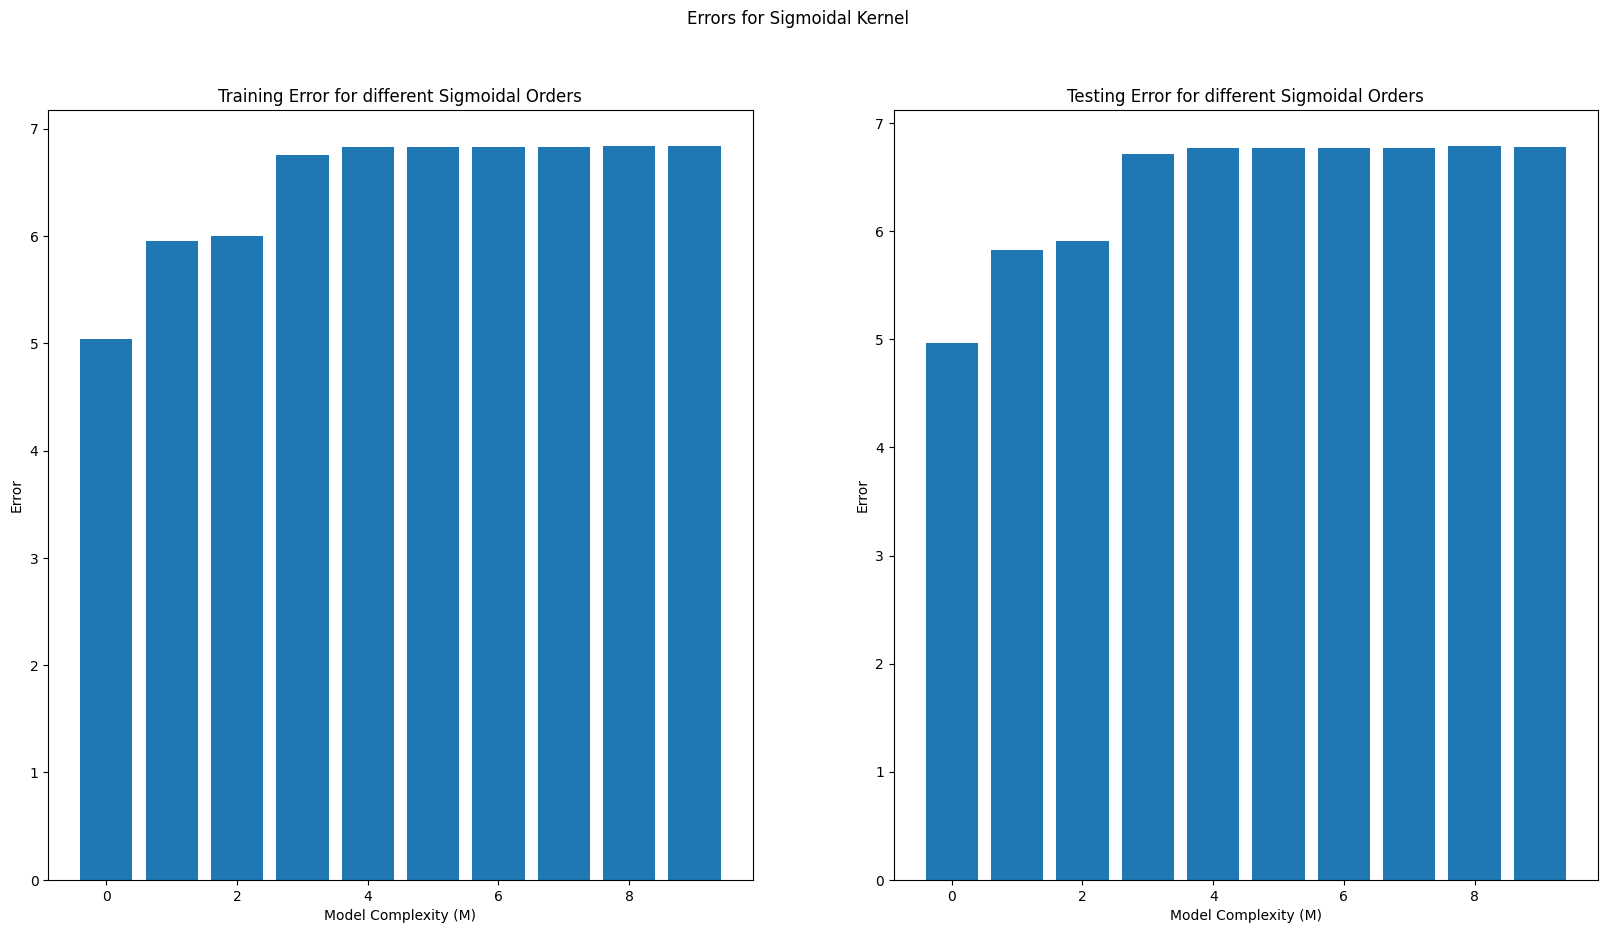

In [ ]:

#Understanding the choice of kernel
########################################
#Generate 100 data points
########################################
def generateData(n):

  x = np.linspace(0,1,n)
  noise = np.random.normal(0,np.sqrt(0.1),n)
  t = np.sin(2*np.pi * x) + noise
  return x,t

def splitData(x,t):

  x_train = x[1::2]
  t_train = t[1::2]

  x_test = x[0::2]
  t_test = t[0::2]
  return x_train,t_train,x_test,t_test





#Obtian train and test splits
#Take even samples for training and odd samples for testing



n=100
x,t = generateData(n)
x_train,t_train,x_test,t_test = splitData(x,t)





def kernel_transformation(x,M):   ## R_1 to R_M+1
  return [x**i for i in range(M+1)]

#Function to estimate the parameters
def KernelRegressionFit(X_train,Y_train,kernelType,M,lamda): #(training data, training targets, type of kernel, regularization coefficient)
    #kernelType : {Polynomial,Gaussian,Sigmoid}
    #print(X_train.shape)
    X_train = np.reshape(X_train, (-1,1))
    Y_train = np.reshape(Y_train, (-1,1))


    X = []
    
    if kernelType=='polynomial':
      #Use polynomial kernel to transform the data
      X = X_train ** np.arange(M+1)

      

    if kernelType=='gaussian':
      #Use Gaussian kernel to transform the data
      sigma = 0.1 # standard deviation
      mu_values  = np.linspace(-1,1,M+1)
      X= np.exp(-(X_train-mu_values)**2/(2*sigma**2))

    
      


    if kernelType=='sigmoidal':
       s=0.2 # Scale parameter for logistic function
       mu_values = np.linspace(-1,1,M+1)
       X= expit((X_train-mu_values)/s)
       

      #Use Sigmoid kernel to transform the data
      

    #Estimate weights using Pseudo iverse solution
    w_opt = np.linalg.inv(X.T @ X + lamda* np.identity(M+1,dtype=int)) @ X.T @ (Y_train.reshape(-1,1))

    #Return the estimated weights
    return w_opt


# print(x)
# print(t)
# print(KernelRegressionFit(x_train,t_train,'gaussian',5,0)   )
# print(KernelRegressionFit(x_train,t_train,'polynomial',5,0))
# print(KernelRegressionFit(x_train,t_train,'sigmoidal',5,0))
def kernelRegressionPred(w_est,X_train,X_test,kernelType,lamda=0):
    X_tr = []  
    X_te = []
    X_train = np.reshape(X_train, (-1,1))

    X_test = np.reshape(X_test, (-1,1))

    M = len(w_est)-1


    if kernelType=='polynomial':
      #Use polynomial kernel to transform the data
      X_train = X_train ** np.arange(M+1)
      X_test = X_test ** np.arange(M+1)

      

    if kernelType=='gaussian':
      #Use Gaussian kernel to transform the data
      sigma = 0.1 # standard deviation
      mu_values  = np.linspace(-1,1,M+1)
      X_train= np.exp(-(X_train-mu_values)**2/(2*sigma**2))
      X_test= np.exp(-(X_test-mu_values)**2/(2*sigma**2))

    
      


    if kernelType=='sigmoidal':
       s=0.2 # Scale parameter for logistic function
       mu_values = np.linspace(-1,1,M+1)
       X_train= expit((X_train-mu_values)/s)
       X_test= expit((X_test-mu_values)/s)


    #Estimate training and testing targets


    t_train_hat = X_train @ w_est
    t_test_hat = X_test @ w_est

    return t_train_hat,t_test_hat


#Function to compute the training and testing errors from the current weight estimates
def KernelRegressionPred_Error(w_est,t_train,t_train_hat,t_test,t_test_hat,lamda=0):
    #kernelType : {Polynomial,Gaussian,Sigmoid}

    

    TrainError =  np.sqrt( np.sum(np.square(t_train-t_train_hat) + lamda * np.linalg.norm(w_est)**2)/t_train.shape[0])
    # TestError = np.sqrt(np.square(t_test-t_test_hat).mean()  )
    TestError =  np.sqrt( np.sum(np.square(t_test-t_test_hat) + lamda * np.linalg.norm(w_est)**2)/t_test.shape[0])





    

    #Compute and return the training and testing errors
    return TrainError,TestError


# #Iterate through range of M values
M_range=list(range(10))

polynomial_tr_error = []
polynomial_te_error = []
gaussian_tr_error = []
gaussian_te_error = []
sigmoid_tr_error = []
sigmoid_te_error = []

kernels = ['polynomial','gaussian','sigmoidal']



for M in M_range:
   
    #Fit Mth order polynomial using three kernels i.e {Polynomial,Gaussian,Sigmoid}

    
    # w_est_polynomial = KernelRegressionFit(x_train,t_train,'polynomial',M,0)
    # w_est_gaussian = KernelRegressionFit(x_train,t_train,'gaussian',M,0)
    # w_est_sigmoidal = KernelRegressionFit(x_train,t_train,'sigmoidal',M,0)
    plt.figure(figsize=(18,6),layout='tight')
    for i,kernel in enumerate(kernels):
        
        w_est = KernelRegressionFit(x_train,t_train,kernel,M,0)
        t_train_hat, t_test_hat = kernelRegressionPred(w_est, x_train, x_test, kernel)



        # Plot training and testing predictions alongside original targets
        
        
        # Training data plot
        plt.subplot(1, 3,i+1)
        plt.scatter(x_train, t_train, color='blue', label='True Training Data')
        plt.scatter(x_train, t_train_hat, color='red', label=f'Predicted Training Data ')
        plt.title(f'{kernel.capitalize()} Kernel ')
        plt.grid(True)
        plt.xlabel('x')
        plt.ylabel('t')
        # plt.legend()
        
        # Testing data plot
        plt.subplot(1, 3,i+1)
        plt.grid(True)
        plt.scatter(x_test, t_test, color='green', label='True Testing Data')
        plt.scatter(x_test, t_test_hat, color='orange', label='Predicted Testing Data')
        # plt.title(f'{kernel.capitalize()} Kernel - Testing Data (M={M})')
        plt.xlabel('x')
        plt.ylabel('t')
        # plt.legend()
      




        TrError, TeError = KernelRegressionPred_Error(
            w_est,t_train, t_train_hat, t_test, t_test_hat, lamda=0
        )
        if kernel == 'polynomial':
          polynomial_tr_error.append(TrError)
          polynomial_te_error.append(TeError)
        if kernel == 'gaussian':
          gaussian_tr_error.append(TrError)
          gaussian_te_error.append(TeError)
        if kernel == 'sigmoidal':
          sigmoid_tr_error.append(TrError)
          sigmoid_te_error.append(TeError)
    plt.suptitle(f"M={M}")
    plt.legend()
    plt.show()








#Plot training error vs polynomial order and testing error vs polynomial order for all the three different kernels



plt.figure(figsize=(20, 10))
plt.suptitle("Errors for Polynomial Kernel")
plt.subplot(1,2,1)
plt.xlabel('Model Complexity (M)')
plt.title('Training Error for different Polynomial Orders')
plt.ylabel('Error')
plt.bar(M_range, polynomial_tr_error, label="Polynomial Train Error")
plt.subplot(1,2,2)
plt.bar(M_range, polynomial_te_error, label="Polynomial Test Error")
plt.title('Testing Error for different Polynomial Orders')
plt.xlabel('Model Complexity (M)')
plt.ylabel('Error')
plt.show()




plt.figure(figsize=(20, 10))
plt.suptitle("Errors for Gaussian Kernel")
plt.subplot(1,2,1)
plt.xlabel('Model Complexity (M)')
plt.title('Training Error for different Gaussian Orders')
plt.ylabel('Error')
plt.bar(M_range, gaussian_tr_error, label="Gaussian Train Error")
plt.subplot(1,2,2)
plt.bar(M_range, gaussian_te_error, label="Gaussian Test Error")
plt.title('Testing Error for different Gaussian Orders')
plt.xlabel('Model Complexity (M)')
plt.ylabel('Error')
plt.show()

plt.figure(figsize=(20, 10))
plt.suptitle("Errors for Sigmoidal Kernel")
plt.subplot(1,2,1)
plt.xlabel('Model Complexity (M)')
plt.title('Training Error for different Sigmoidal Orders')
plt.ylabel('Error')
plt.bar(M_range, sigmoid_tr_error, label="Sigmoidal Train Error")
plt.subplot(1,2,2)
plt.bar(M_range, sigmoid_te_error, label="Sigmoidal Test Error")
plt.title('Testing Error for different Sigmoidal Orders')
plt.xlabel('Model Complexity (M)')
plt.ylabel('Error')
plt.show()




########################################
#Repeat the experiments by changing target function
########################################

















<b> Part - (4) : Understanding online training  </b>

(a). Repeat 3(a) and 3(b) using stochastic gradient descent for weight update.Study the effect of step size η on convergence of the weights, and compare them to those obtained using closed form expressions in 3.  Plot the mse as a  function  of  iterations.

(b). Study the effect of batch size on the speed of convergence

(c). Report all your observations

In [8]:
#Understanding online training
########################################
#Repeat 3(a) and 3(b) using stochastic gradient descent for weight update ( plot required results )
########################################

def ErrorPred(w_est,X_train,Y_train,X_test,Y_test,kernelType): #(estimated weight, training data, training targets, testing data, testing targets, type of the kernel )
    #kernelType : {Polynomial,Gaussian,Sigmoid}
    X_tr = []
    X_te = []
    M = len(w_est)-1
    if kernelType=='polynomial':
      #Use polynomial kernel to transform the data

    if kernelType=='gaussian':
      #Use Gaussian kernel to transofrm the data

    if kernelType=='sigmoidal':
      #Use sigmoidal kernel to transform the data

    #Compute and return the train and test errors
    return TrainError, TestError


def OnlineTraining(X_train,Y_train,X_test, Y_test, kernelType,M,Epochs,BatchSize,stepSize): #(training data, training targets, testing data, testing targets, tupe of the kernel, order of the mode, Number of epochs, Batch size, Step size)
    #kernelType : {Polynomial,Gaussian,Sigmoid}
    #Initialize the weights


    #Initialize the necessary variables
    #Iterate through epochs

    epochs = range(Epochs)
    for epoch in epochs:
        #Compute the train and test errors using the current weights
        tr_err, te_err = ErrorPred(weights, X_train, Y_train, X_test, Y_test, kernelType)
        #Store training and testing errors for plotting

        #Shuffle the data

        #Iterate through the batches
        for batch in range(batches):
            #Initialize the necessary variables
            #Get a batch of data

            #Iterate through the data points of obtained batch
            for n in range(len(data_b)):
                #Obtain kernel representation
                X_tr = []
                if kernelType=='polynomial':

                if kernelType=='gaussian':

                if kernelType=='sigmoidal':

                #Compute the gradient of weight's

                #Compute the running mean of the weights gradients for the batch update

            #Update the weights using mean gradient, consider using reasonable stepSize

    #Plot training and testing error across the epochs


    #Return the estimated weights
    return weights

def OnlinePred(w_est,X_train,X_test,kernelType): #(estimated weights, training data, testing data, type of the kernel )
    #kernelType : {Polynomial,Gaussian,Sigmoid}
    #Initialize the required variables

    #Obtain kernel representations
    if kernelType=='polynomial':

    if kernelType=='gaussian':

    if kernelType=='sigmoidal':

    #Compute and return the training and testing target estimates
    return Y_tr_error,Y_te_error

def OnlinePred_Error(w_est,X_train,Y_train,X_test,Y_test,kernelType): #(estimated weights, training data, training targets, testing data, testing targets, type of the kernel )
    #kernelType : {Polynomial,Gaussian,Sigmoid}
    #Initialize the required variables

    #Obtain kernel representations
    if kernelType=='polynomial':

    if kernelType=='gaussian':

    if kernelType=='sigmoidal':

    #Compute and return the training and testing errors
    return Y_tr_error,Y_te_error


##################################################
#Repeat 3a with online training
##################################################




##################################################
#Repeat 3b with online training
##################################################




########################################
#Study the effect of stepSize on the convergence of weights ( plot required results )
########################################




########################################
#Study the effect of batchsize on the speed of convergence ( plot required results )
########################################






IndentationError: expected an indented block (3599125255.py, line 14)

<b> Report your observations </b>

1.

2.

3.



<b> Part - (5) : Understanding bias-variance trade-off  </b>

(a). Generate L=100 datasets of noisy sinusoidal data, each having N=25  datapoints. For each dataset, fit a $M=25^{th}$ order linear regression model consisting of 24 Gaussian basis functions and one bias parameter.  Use regularized least squares, governed by the parameter λ, to estimate the parameters $\textbf{w}$. Illustrate the concept of bias and variance using these 100 different parameter fits.
1.   Chose three different regularization coefficeints (low,middle and high)
2. For every regularization coefficient, produce two plots: one displaying 100 estimated curves, and the other showing the mean of the estimated curves alongside the original function.
2. For three regularization coefficients, you should have a total of six plots, meaning two plots for each regularization.
3. Using the six plots above, describe the bias-variance trade-off.


(b). Report all your observations







Error for lambda 1e-07 is 4.891820355571083


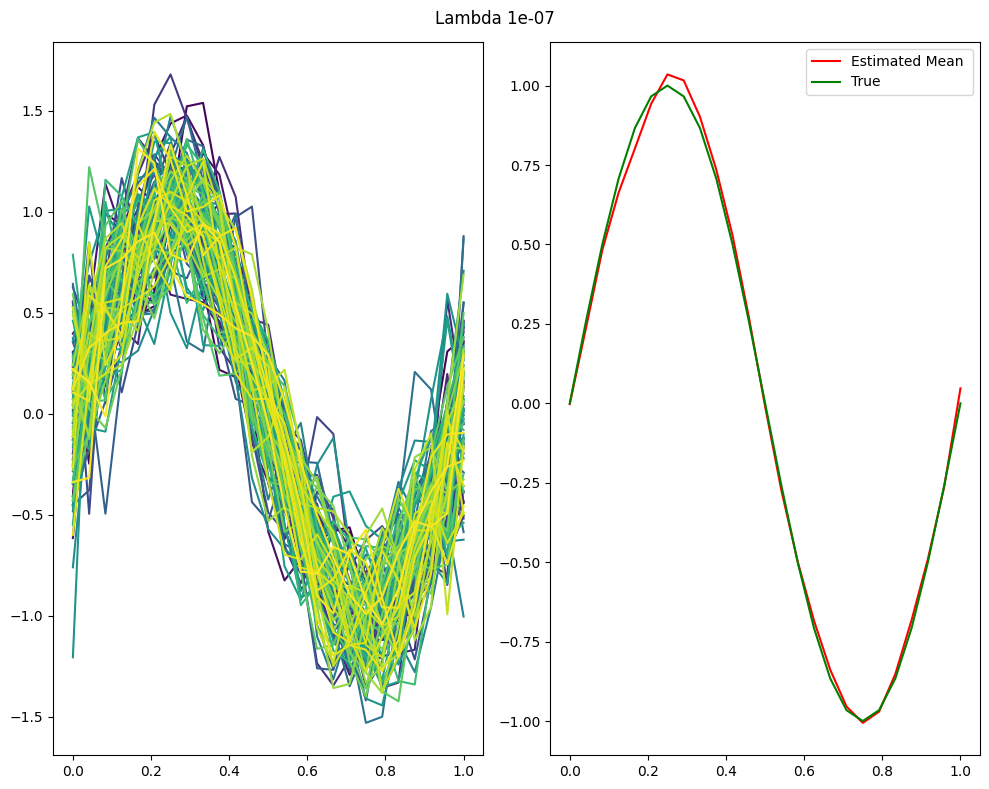

Error for lambda 1 is 4.69565136040187


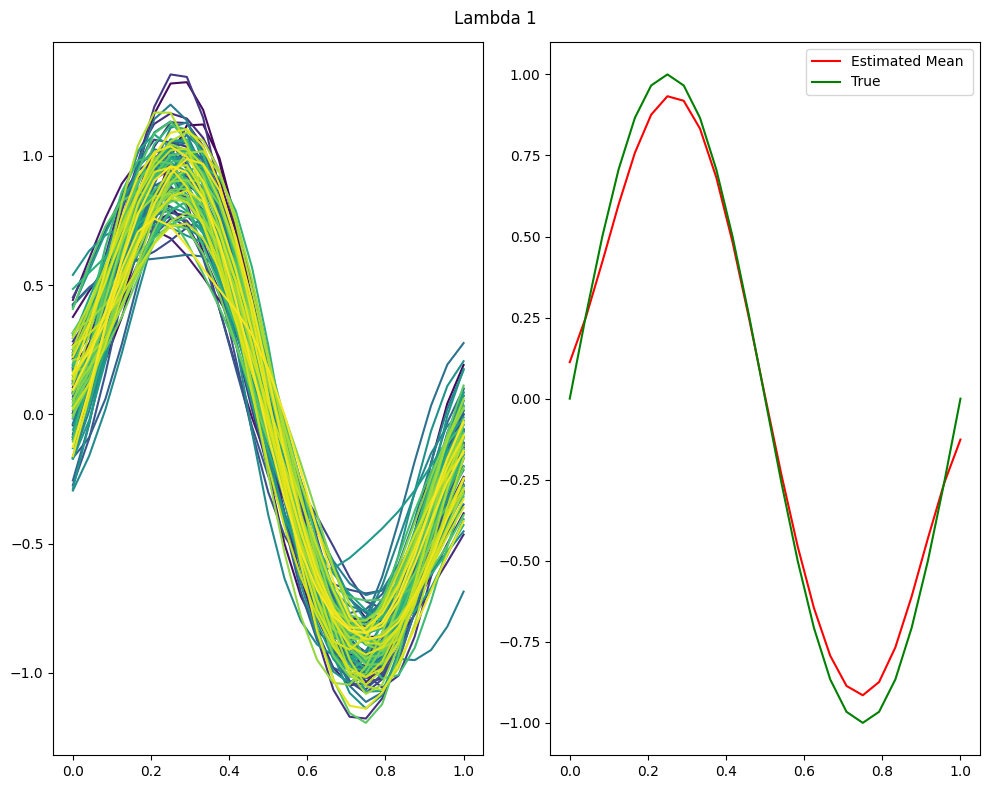

Error for lambda 50 is 3.5319540806342586


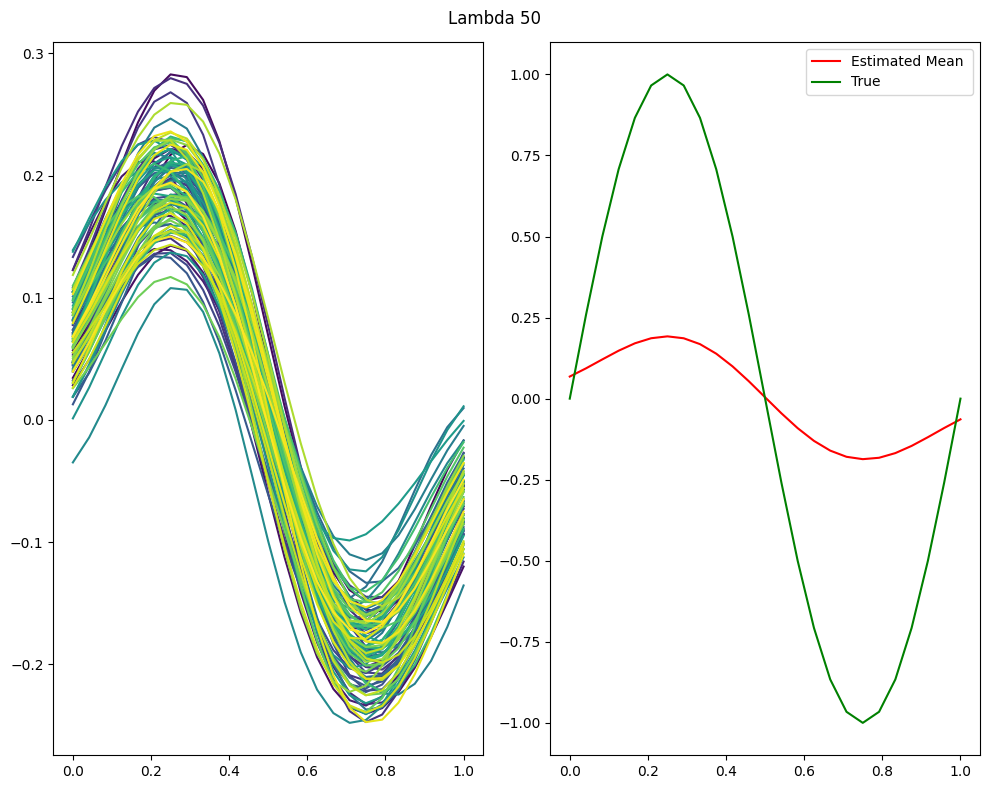

In [ ]:
#Understanding the bias-variance trade-off
########################################
#Generate 100 data sets of noisy sinusoidal data
########################################





L = 100
N = 25



x = np.linspace(0, 1, N)


def generate_noisy_sinusoidal_data(x,N):
   
    noise = np.random.normal(0, np.sqrt(0.1), N)
    t = np.sin(2 * np.pi * x) + noise
    return x, t


datasets = np.array([generate_noisy_sinusoidal_data(x,N) for _ in range(L)])


y_true = np.sin(2 * np.pi * x)

lamdas = [1e-7 , 1,50]


colors = plt.cm.viridis(np.linspace(0, 1, 100))








for lamda in lamdas:
    fig,axs = plt.subplots(1,2,figsize=(10,8),layout='tight')
    y_hat_sum = np.zeros((N,1))
    for i,dataset in enumerate(datasets):
        dataset = dataset.T
        

        X= dataset[:,0].reshape(-1,1)
        y = dataset[:,1].reshape(-1,1)


        sigma = 0.1 # standard deviation
        mu_values  = np.linspace(-1,1,24)

        phi_X= np.exp(-(X-mu_values)**2/(2*sigma**2))    
        phi_X = np.hstack((np.ones((N, 1)), phi_X))             ## once understand and check !!!!!
    

    
########################################
#Use regularized least squares to estimate w
########################################

        w_opt = np.linalg.inv(phi_X.T @ phi_X + lamda* np.identity(N,dtype=int)) @ phi_X.T @ (y.reshape(-1,1))

        y_hat = phi_X @ w_opt
        y_hat_sum = y_hat_sum + y_hat
        # plt.plot(X,y,color='blue',label='Original')
        axs[0].plot(X,y_hat,color=colors[i])

    y_hat_mean = y_hat_sum/L
    err = np.sqrt(np.sum(np.square(y_true-y_hat_mean))/N)
    print(f"Error for lambda {lamda} is {err}")

    axs[1].plot(X,y_hat_mean,color='red',label="Estimated Mean ")
    axs[1].plot(X,y_true,color='green',label="True")
    axs[1].legend()
   
    plt.suptitle(f"Lambda {lamda}")
    plt.show()

    










<b> Report your observations </b>

1.

2.

3.



<b> Part - (6) : Understanding
Maximum a Posteriori (MAP) estimate  </b>

(a). Generate 100 noisy data points of a sinusoid. Fit a $20^{th}$  order  linear regression  model  with  Gaussian  basis  functions. Starting from a standard normal prior, update the statistics of the posterior density of the parameters using Bayesian sequential updates.

(b). Sample a parameter vector from the posterior distribution, and obtain the curve fit for this realization. Repeat this for several times, and estimate the average of these curve fits, and compare it with the original sinusoid

(c). Use the posterior distribution of the parameters to evaluate the predictive distribution of target $p(t_{0}/x_{0},X,t)$, and plot it for different number of training data points, as discussed in the class.

(d). Report all your observations

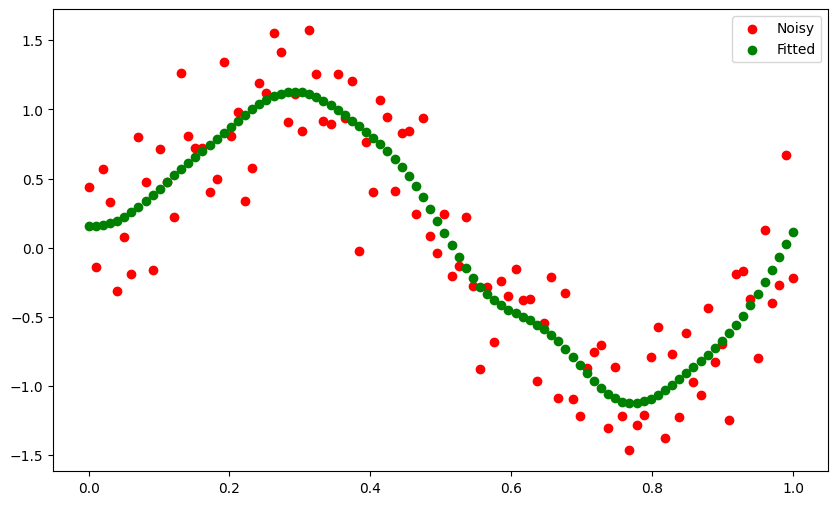

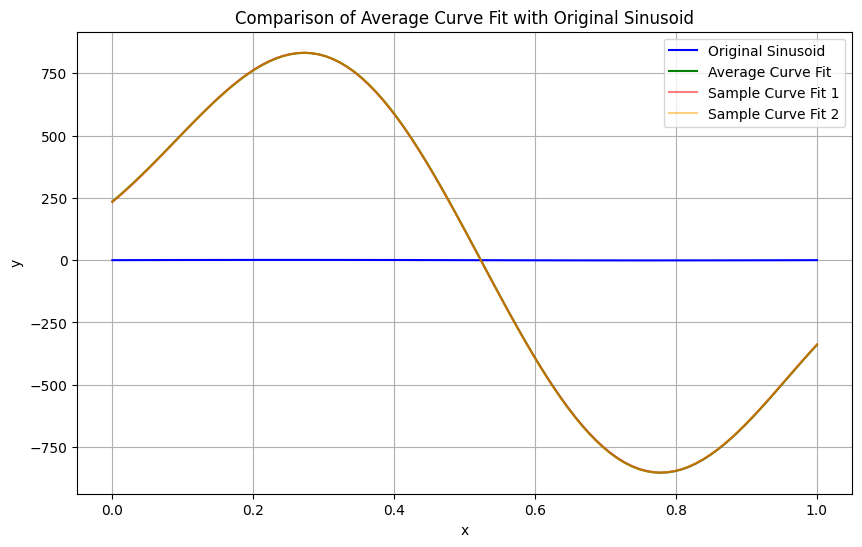

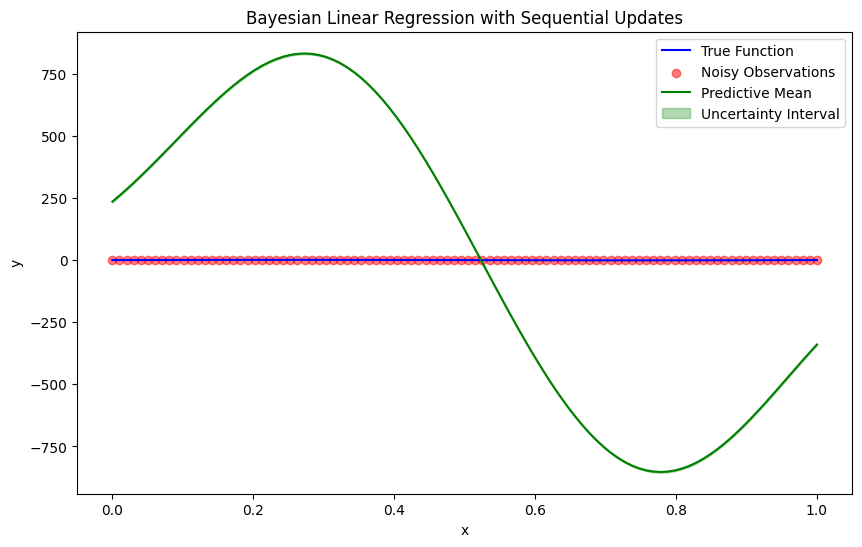

In [70]:
#Understanding MAP estimate
########################################
#Generate 100 data sets of noisy sinusoidal data
########################################


beta = 10 # Variance of noise = 0.1


x = np.linspace(0, 1, 100)
noise = np.random.normal(0, np.sqrt(1/beta), x.shape)
t_true = np.sin(2 * np.pi * x)

t_noisy = np.sin(2 * np.pi * x) + noise

# Fit a 20th order linear regression model with Gaussian basis functions
M = 20
sigma = 0.1  # Standard deviation for Gaussian basis functions
mu_values = np.linspace(0, 1, M)







def design_matrix(x, mu_values, sigma):
    return np.exp(-(x[:, None] - mu_values[None, :])**2 / (2 * sigma**2))

Phi = design_matrix(x, mu_values, sigma)


lambda_reg = 1e-3  
w_opt = np.linalg.inv(Phi.T @ Phi + lambda_reg * np.identity(M)) @ Phi.T @ t_noisy

# Plot the original data and the fitted curve

Phi_fit = design_matrix(x, mu_values, sigma)
t_hat = Phi @ w_opt



plt.figure(figsize=(10, 6))
plt.scatter(x, t_noisy, color='red', label='Noisy')
plt.scatter(x, t_hat, color='green', label='Fitted')
plt.legend()
plt.show()








########################################
#Update the statistics of posterior density
########################################
#Initialie the parameters for standard normal prior



alpha = 1.0                      # Prior precision


S_0 = np.eye(M) / alpha          # Prior covariance
m_0 = np.zeros(M)                # Prior mean




S_N = S_0.copy()
m_N = m_0.copy()








#Iterate through the data points and update the stats of posterior density


for i in range(len(x)):
    phi_i = Phi[i,:]  #phi_x_n+1
    y_i = t_noisy[i]        #t_n+1


      # Update posterior covariance
    S_N_inv = np.linalg.inv(S_N)
    S_N_new_inv = S_N_inv + beta * phi_i @ phi_i.T
    S_N_new = np.linalg.inv(S_N_new_inv)
    S_N_new = np.linalg.inv(S_N_new_inv)





    # Update posterior mean
    m_N_new = S_N_new @ (S_N_inv @ m_N + beta * phi_i.flatten() * y_i)
    
    # Update for next iteration
    S_N, m_N = S_N_new, m_N_new





########################################
#Sample weight vector from posterior distribution. Estimate the curve, repeat the procedure for 100 times and get the avg fit
########################################


parameter_samples = np.random.multivariate_normal(mean=m_N, cov=S_N, size=100)








########################################
#Predictive distribution analysis
########################################
#Predictive distribution analysis through sampling
#Iterate through data points and sample weight vectors when partial data points are seen, and plot the curves


parameter_samples = np.random.multivariate_normal(mean=m_N, cov=S_N, size=100)

# Generate curve fits for each sampled parameter vector
curve_fits = []
for params in parameter_samples:
    curve_fit = Phi @ params  # Compute the curve fit for the sampled parameters
    curve_fits.append(curve_fit)

# Estimate the average of these curve fits
average_curve_fit = np.mean(curve_fits, axis=0)



plt.figure(figsize=(10, 6))

# Plot original sinusoid

plt.plot(x,t_true, label="Original Sinusoid", color="blue")

# Plot average curve fit
plt.plot(x, average_curve_fit, label="Average Curve Fit", color="green")

# Plot individual sample fits for comparison
plt.plot(x, curve_fits[0], label="Sample Curve Fit 1", color="red", alpha=0.5)
plt.plot(x, curve_fits[1], label="Sample Curve Fit 2", color="orange", alpha=0.5)

# Add labels and legend
plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparison of Average Curve Fit with Original Sinusoid")
plt.legend()
plt.grid(True)
plt.show()










#Predictive distribution analysis through variance
#Iterate through data points and obtain necessary plots as discussed in the class

 # Predictions using final posterior


y_pred_mean = []
y_pred_var = []
for i in range(len(x)):
    phi_i = Phi[i,:]
    y_pred_mean.append(phi_i.T @ m_N)
    y_pred_var.append(phi_i @ S_N @ phi_i.T + (1 / beta))





plt.figure(figsize=(10, 6))
plt.plot(x, t_true, label="True Function", color="blue")
plt.scatter(x, t_noisy, label="Noisy Observations", color="red", alpha=0.5)
plt.plot(x, y_pred_mean, label="Predictive Mean", color="green")


plt.fill_between(
    x,
    y_pred_mean - 2 * np.sqrt(y_pred_var),
    y_pred_mean + 2 * np.sqrt(y_pred_var),
    color="green",
    alpha=0.3,
    label="Uncertainty Interval"
)
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Bayesian Linear Regression with Sequential Updates")
plt.show()
        # plt.plot(X,y,color='blue',label='Original')



<b> Report your observations </b>

1.

2.

3.

